
<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Mission</h2>
</div>


- Développez un système de suggestion de tag pour le site de StackOverflow
- L'utilisation d'un algorithme de ML qui assigne automatiquement plusieurs tags pertinents à une question. 

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Les données</h2>
</div>
 
- L'utilisation d'un outil d'export de données: stackexchange explore". 

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Contraintes</h2>
</div>

- Mettre en œuvre une approche non supervisée.
- Utiliser une approche supervisée ou non pour extraire des tags à partir des résultats précédents.
- Comparer ses résultats à une approche purement supervisée, après avoir appliqué des méthodes d’extraction de features spécifiques des données textuelles.
- Mettre en place une méthode d’évaluation propre, avec une séparation du jeu de données pour l’évaluation.
- Pour suivre les modifications du code final à déployer, utiliser un logiciel de gestion de versions, par exemple Git.

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Le traitement du langage naturel ou NLP</h2>
</div>

- Est une branche de l'intelligence artificielle qui consiste à relier les machines à comprendre les humains dans leur langage naturel. Le langage naturel peut être sous forme de texte ou de son, qui sont utilisés pour que les humains se communiquent entre eux. La NLP peut permettre aux humains de communiquer avec les machines de manière naturelle.

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Text Calssification</h2>
</div>

- Est un processus impliqué dans l'analyse des sentiments. C'est la classification de l'opinion ou des expressions des peuples en différents sentiments. Les sentiments sont positifs, neutres et négatifs, les évaluations et Happy, Sad. L'analyse des sentiments peut être effectuée sur différentes industries centrées sur le consommateur pour analyser l'opinion des gens sur un produit ou un sujet particulier.

- Le traitement du langage naturel a ses racines dans les années 1950. Déjà en 1950, Alan Turing publiait un article intitulé "Computing Machinery and Intelligence" qui proposait ce qu'on appelle maintenant le test de Turing comme critère d'intelligence, une tâche qui implique l'interprétation automatisée et la génération du langage naturel, mais à l'époque non articulée comme un problème distinct de l'intelligence artificielle.

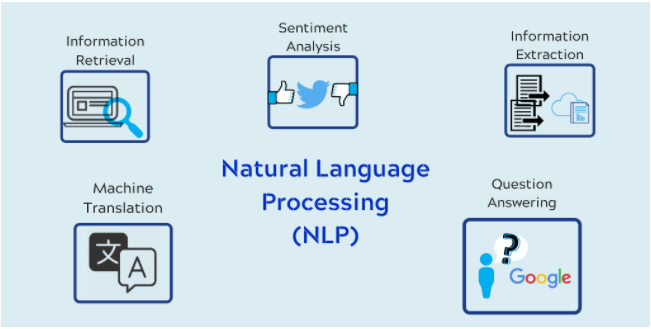

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Table des matières</h2>
</div>


- 1) Loading data
- 2) EDA
- 3) Data Preprocessing:  
   - Cleaning the corpus 
   - Stemming 
   - All together 

- 4) Tokens visualisation 
- 5) Vectorization:  
    - Tunning CountVectorizer 
    - TF_IDF
    - Word Embeddings: GloVe 

- 6) Modeling: 
  

- 7) LSTM

- 8) Latent Dirichilet Allocation:
   -  Model Implementation: 
      - Data Transformation: corpus and Dictionary
      - Base Model 
      - Huper_parameter Tuning 
      - Final  model
      - Visualize Results 


In [1]:
!pip install abbreviations

In [2]:
!wget  https://anaconda.org/pytorch/faiss-gpu/1.2.1/download/linux-64/faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!tar xvjf faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install mkl

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.
tar: Error opening archive: Failed to open 'faiss-gpu-1.2.1-py36_cuda9.0.176_1.tar.bz2'
'cp' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [3]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-05-17 11:52:20.193888: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-05-17 11:52:20.194272: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
!pip install pyLDAvis

In [5]:
!pip install - U gensim

ERROR: Invalid requirement: '-'


In [6]:
!pip install --upgrade pip

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>  Import Packages</h2>
</div>

In [1]:
import re
import nltk
import random
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from collections import defaultdict
from pprint import pprint

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud


import spacy
from spacy.tokenizer import Tokenizer
from bs4 import BeautifulSoup
from abbreviations import schwartz_hearst
import pickle
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, jaccard_score, make_scorer, hamming_loss, f1_score, classification_report, precision_recall_fscore_support, average_precision_score, multilabel_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import re
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import jaccard_score
from sklearn.metrics import hamming_loss
import seaborn as sns
from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint
import time
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Loading Data</h2>
</div>

In [9]:
data= pd.read_csv("QueryResults.csv")
data.head(2)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,41244,1,233505.0,NaN,2008-09-03 06:30:31,NaN,690,283067,"<p>I found an example in the <a href=""http://m...",1786.0,John Sheehan,5519709.0,John Sheehan,2020-05-06 08:43:38,2020-09-27 11:39:24,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,<c#><linq><linq-to-objects>,20,1,440,NaN,NaN,CC BY-SA 4.0
1,8315088,1,8479953.0,NaN,2011-11-29 17:30:29,NaN,302,108680,<p>RequireJS seems to do something internally ...,285714.0,NaN,285714.0,NaN,2013-12-11 17:09:20,2018-09-12 07:43:01,Prevent RequireJS from Caching Required Scripts,<javascript><jquery><requirejs>,12,6,116,NaN,NaN,CC BY-SA 3.0


In [10]:
print("The shape of our data is: ",data.shape)

The shape of our data is:  (11935, 23)


In [11]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11935 non-null  int64  
 1   PostTypeId             11935 non-null  int64  
 2   AcceptedAnswerId       10514 non-null  float64
 3   ParentId               0 non-null      float64
 4   CreationDate           11935 non-null  object 
 5   DeletionDate           0 non-null      float64
 6   Score                  11935 non-null  int64  
 7   ViewCount              11935 non-null  int64  
 8   Body                   11935 non-null  object 
 9   OwnerUserId            11629 non-null  float64
 10  OwnerDisplayName       2396 non-null   object 
 11  LastEditorUserId       11159 non-null  float64
 12  LastEditorDisplayName  1715 non-null   object 
 13  LastEditDate           11315 non-null  object 
 14  LastActivityDate       11935 non-null  object 
 15  Ti

In [12]:
data.describe()

,Id,PostTypeId,AcceptedAnswerId,ParentId,DeletionDate,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount
count,1.193500e+04,11935.0,1.051400e+04,0.0,0.0,11935.000000,1.193500e+04,1.162900e+04,1.115900e+04,11935.000000,11935.000000,11935.000000
mean,7.945389e+06,1.0,9.170627e+06,NaN,NaN,559.323586,4.506058e+05,6.293610e+05,2.053495e+06,15.977796,3.537495,210.635693
std,9.851468e+06,0.0,1.098100e+07,NaN,NaN,770.905790,5.547203e+05,1.039230e+06,2.685047e+06,14.448864,4.167144,339.623768
min,9.000000e+00,1.0,7.700000e+01,NaN,NaN,-146.000000,4.448000e+03,1.000000e+00,-1.000000e+00,1.000000,0.000000,81.000000
25%,9.876850e+05,1.0,1.221942e+06,NaN,NaN,226.000000,1.394625e+05,4.988700e+04,1.357295e+05,8.000000,1.000000,99.000000
50%,3.964681e+06,1.0,4.737625e+06,NaN,NaN,364.000000,2.819310e+05,2.343220e+05,8.759150e+05,13.000000,2.000000,130.000000
75%,1.118298e+07,1.0,1.319848e+07,NaN,NaN,604.000000,5.492590e+05,7.595680e+05,3.064538e+06,20.000000,5.000000,207.000000
max,6.360716e+07,1.0,6.395511e+07,NaN,NaN,25400.000000,9.426474e+06,1.140798e+07,1.505480e+07,518.000000,61.000000,11317.000000


In [13]:
data_tag= data[["Body", "Title", "Tags"]]
data_tag.shape

(11935, 3)

In [14]:
data_tag['Text']= data_tag['Title']+ '_'+ data_tag['Body']

2021-05-17 11:52:48,757 : INFO : NumExpr defaulting to 4 threads.


In [15]:
#we save the old dataframe index:
data_tag['id']=data_tag.index
data_tag.head()

,Body,Title,Tags,Text,id
0,"<p>I found an example in the <a href=""http://m...",Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,<c#><linq><linq-to-objects>,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,0
1,<p>RequireJS seems to do something internally ...,Prevent RequireJS from Caching Required Scripts,<javascript><jquery><requirejs>,Prevent RequireJS from Caching Required Script...,1
2,"<p>Inspired by <a href=""https://devblogs.micro...",How do you rotate a two dimensional array?,<algorithm><matrix><multidimensional-array>,How do you rotate a two dimensional array?_<p>...,2
3,<p>What is the best way to get <code>IDENTITY<...,Best way to get identity of inserted row?,<sql><sql-server><tsql>,Best way to get identity of inserted row?_<p>W...,3
4,<p>I am trying to synchronise a project that I...,How do you synchronise projects to GitHub with...,<android><github><intellij-idea><android-studio>,How do you synchronise projects to GitHub with...,4


In [16]:
data_tag.isna().sum()

Body     0
Title    0
Tags     0
Text     0
id       0
dtype: int64

In [17]:
data_tag['Text'] = data_tag['Text'].str.lower()
data_tag.head()

,Body,Title,Tags,Text,id
0,"<p>I found an example in the <a href=""http://m...",Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,<c#><linq><linq-to-objects>,dynamic linq orderby on ienumerable<t> / iquer...,0
1,<p>RequireJS seems to do something internally ...,Prevent RequireJS from Caching Required Scripts,<javascript><jquery><requirejs>,prevent requirejs from caching required script...,1
2,"<p>Inspired by <a href=""https://devblogs.micro...",How do you rotate a two dimensional array?,<algorithm><matrix><multidimensional-array>,how do you rotate a two dimensional array?_<p>...,2
3,<p>What is the best way to get <code>IDENTITY<...,Best way to get identity of inserted row?,<sql><sql-server><tsql>,best way to get identity of inserted row?_<p>w...,3
4,<p>I am trying to synchronise a project that I...,How do you synchronise projects to GitHub with...,<android><github><intellij-idea><android-studio>,how do you synchronise projects to github with...,4


In [18]:
from bs4 import BeautifulSoup
from urllib import request
for i, row in data_tag.iterrows():
    data_tag.loc[i, "Body"]= BeautifulSoup(str(row["Body"]), 'html.parser').get_text()
    data_tag.loc[i, "Text"]= BeautifulSoup(str(row["Text"]), 'html.parser').get_text()

In [19]:
data_tag.head()

,Body,Title,Tags,Text,id
0,I found an example in the VS2008 Examples for ...,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,<c#><linq><linq-to-objects>,dynamic linq orderby on ienumerable / iqueryab...,0
1,RequireJS seems to do something internally tha...,Prevent RequireJS from Caching Required Scripts,<javascript><jquery><requirejs>,prevent requirejs from caching required script...,1
2,"Inspired by Raymond Chen's post, say you have ...",How do you rotate a two dimensional array?,<algorithm><matrix><multidimensional-array>,how do you rotate a two dimensional array?_ins...,2
3,What is the best way to get IDENTITY of insert...,Best way to get identity of inserted row?,<sql><sql-server><tsql>,best way to get identity of inserted row?_what...,3
4,I am trying to synchronise a project that I ha...,How do you synchronise projects to GitHub with...,<android><github><intellij-idea><android-studio>,how do you synchronise projects to github with...,4


# Let's look at Body question:

In [20]:
q = data_tag["Body"].to_list()
for i in range(12,14):
    print('Question title '+str(i+1)+': '+q[i])
    print('****************************************************************************************************')


Question title 13: I'd like to be able to introspect a C++ class for its name, contents (i.e. members and their types) etc. I'm talking native C++ here, not managed C++, which has reflection. I realise C++ supplies some limited information using RTTI. Which additional libraries (or other techniques) could supply this information?

****************************************************************************************************
Question title 14: Why does the order in which libraries are linked sometimes cause errors in GCC?

****************************************************************************************************


# Let's look at Title Body

In [21]:
q = data_tag["Title"].to_list()
for i in range(12,14):
    print('==> Title body '+str(i+1)+': '+q[i])
    print('****************************************************************************************************')


==> Title body 13: How can I add reflection to a C++ application?
****************************************************************************************************
==> Title body 14: Why does the order in which libraries are linked sometimes cause errors in GCC?
****************************************************************************************************


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Define the Target</h2>
</div>

In [22]:
data_tag['Tags_len']= data_tag['Tags'].apply(lambda x: len(x.split('><')))
data_tag.head()

,Body,Title,Tags,Text,id,Tags_len
0,I found an example in the VS2008 Examples for ...,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,<c#><linq><linq-to-objects>,dynamic linq orderby on ienumerable / iqueryab...,0,3
1,RequireJS seems to do something internally tha...,Prevent RequireJS from Caching Required Scripts,<javascript><jquery><requirejs>,prevent requirejs from caching required script...,1,3
2,"Inspired by Raymond Chen's post, say you have ...",How do you rotate a two dimensional array?,<algorithm><matrix><multidimensional-array>,how do you rotate a two dimensional array?_ins...,2,3
3,What is the best way to get IDENTITY of insert...,Best way to get identity of inserted row?,<sql><sql-server><tsql>,best way to get identity of inserted row?_what...,3,3
4,I am trying to synchronise a project that I ha...,How do you synchronise projects to GitHub with...,<android><github><intellij-idea><android-studio>,how do you synchronise projects to github with...,4,4


In [23]:
max(data_tag['Tags_len'])

5

In [24]:
def count_tag(data, ref_col, list_words):
    ''' Count the number of occurrences and the average score for each tag

    Parameters:

        data (dataframe): dataframe to use 
        ref_col (serie): column of dataframe containing tags
        list_words (list): list of different tags
    '''

    keyword_count = dict()
    index = -1

    for s in list_words:
        keyword_count[s] = []
        keyword_count[s].append(0)
        keyword_count[s].append(0)

    for list_keywords in data[ref_col].str.split('>'):

        if type(list_keywords) == float and pd.isnull(list_keywords):
            continue

        index += 1

        for s in [s for s in list_keywords if s in list_words]:
            if pd.notnull(s):
                keyword_count[s][0] += 1

    # conversion of our dictionary into a list
    keyword_occurences = []

    for tag, item in keyword_count.items():
        keyword_occurences.append([tag[1:], item[0], item[1]/item[0]])

    keyword_occurences.sort(key=lambda x: x[1], reverse=True)

    return keyword_occurences

In [25]:
# Making a list of the different tags

set_tags = set()
scoring = list()

for list_keywords in data_tag['Tags'].str.split('>').values:

    if isinstance(list_keywords, float):
        continue

    set_tags = set_tags.union(list_keywords)

print('There are %d tags' % len(set_tags))

There are 5407 tags


In [26]:
keyword_occurences = count_tag(data_tag, 'Tags', set_tags)
trunc_occurences = keyword_occurences[1:21]
top_tags = [i[0] for i in trunc_occurences]

In [27]:
top_tags

['javascript',
 'python',
 'java',
 'android',
 'git',
 'c#',
 'c++',
 'html',
 'ios',
 'css',
 'jquery',
 '.net',
 'php',
 'c',
 'string',
 'node.js',
 'bash',
 'sql',
 'objective-c',
 'mysql']

In [28]:
def most_common(tags):
    ''' keep only the tags that are part of the 200 most used tags
    on StackOverflow

    tags: tags associated to post
    '''

    clean_tags = str(tags).split('>')[:-1]
    tags_filtered = []

    for tag in clean_tags:

        if tag[1:] in top_tags:
            tags_filtered.append(tag[1:])

    return tags_filtered

In [29]:
# SAUVEGARDE
with open('top_tags.pkl', 'wb') as f:
    pickle.dump(top_tags, f)

In [30]:
data_tag['Tags'] = data_tag['Tags'].apply(lambda x: most_common(x))
data_tag['Tags'] = data_tag['Tags'].apply(lambda x: x if len(x) > 0 else None)

In [31]:
data_tag.dropna(subset=['Tags'], inplace=True)
data_tag.shape

(8763, 6)

In [32]:
data_tag.head()

,Body,Title,Tags,Text,id,Tags_len
0,I found an example in the VS2008 Examples for ...,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,[c#],dynamic linq orderby on ienumerable / iqueryab...,0,3
1,RequireJS seems to do something internally tha...,Prevent RequireJS from Caching Required Scripts,"[javascript, jquery]",prevent requirejs from caching required script...,1,3
3,What is the best way to get IDENTITY of insert...,Best way to get identity of inserted row?,[sql],best way to get identity of inserted row?_what...,3,3
4,I am trying to synchronise a project that I ha...,How do you synchronise projects to GitHub with...,[android],how do you synchronise projects to github with...,4,4
5,"Given a string of JSON data, how can I safely ...",Safely turning a JSON string into an object,[javascript],safely turning a json string into an object_gi...,5,3



<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> EDA 🛠</h2>
</div>

In [33]:
def create_corpus():
    corpus=[]
    for x in data_tag["Body"].str.split():
        for i in x:
            corpus.append(i)
    return corpus
corpus= create_corpus()
print(corpus[10:15])

['LINQ', 'that', 'allows', 'you', 'to']


# The common stopwords in Body: 

In [34]:
stop=set(stopwords.words('english'))
dic= defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top = sorted(dic.items(), key= lambda x:x[1], reverse=True)[:20]

In [35]:
# Display the stowords
np.array(stop)

array({'out', 'd', 'shan', 'herself', 'above', 'being', 'you', 'the', 'further', "needn't", 'yourself', 'ourselves', 'nor', 'himself', 'hasn', 'now', 'he', 'off', 'an', 'than', 'our', 'down', "shan't", 'yourselves', 'can', 'same', 'more', 'if', "didn't", "mustn't", 'once', 'no', 'because', 'some', 'was', 'yours', 'theirs', 'couldn', 'below', 'having', 'whom', 'over', 'here', "you're", 'that', 'my', 'she', 'this', 'those', "shouldn't", 'all', 'mightn', "isn't", 'but', 'against', "that'll", "couldn't", 'his', 'had', 'there', 'with', 'haven', 'ours', 'at', 'these', 'doing', 'then', 'be', 's', 'should', 'wasn', 'themselves', 'him', 'who', 'weren', 'hadn', 'too', 'and', 'are', 'do', 'their', 'y', "mightn't", "won't", 'shouldn', 'has', 'them', 'both', 'very', 'they', 'just', 'm', 'of', 'from', 'where', 'through', 'on', 'during', 'under', "wasn't", 'have', 'by', 'not', "don't", 'her', 'when', 'into', 'am', 'were', 'any', 'wouldn', "you'll", 'for', "she's", 'each', 'needn', 'as', 've', 'ain', 

<BarContainer object of 20 artists>

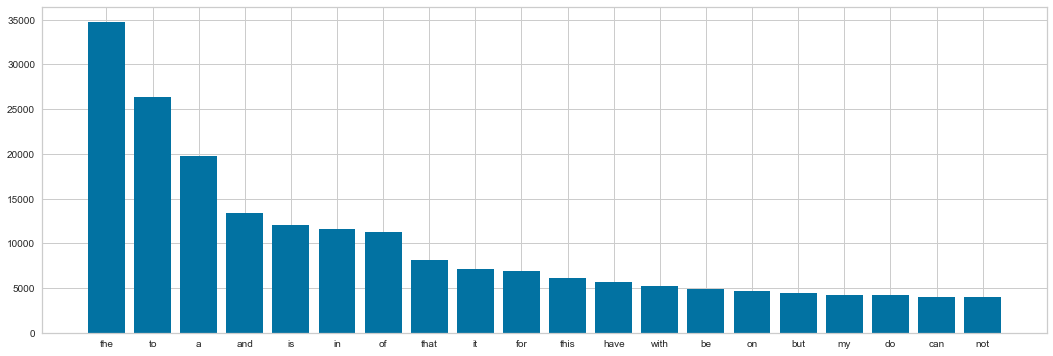

In [36]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

# Analysing punctuations: 

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


<BarContainer object of 40 artists>

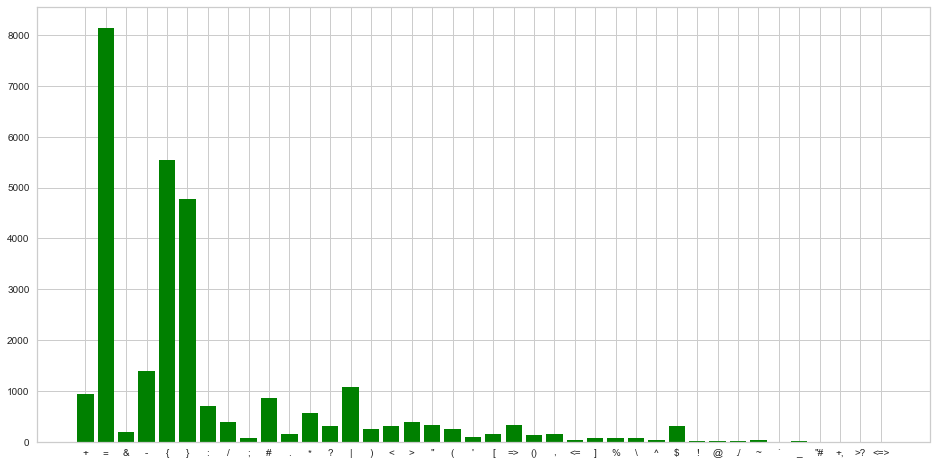

In [37]:
plt.figure(figsize=(16, 8))
corpus= create_corpus()

dic= defaultdict(int)
special= string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

print (special)        
x, y= zip(*dic.items())   
plt.bar(x, y, color='green')

# Common words in Body 

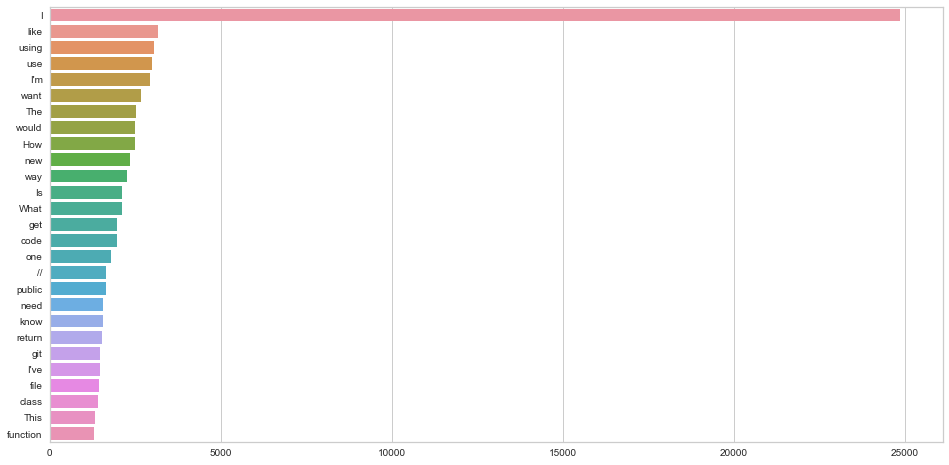

In [38]:
plt.figure(figsize=(16, 8))
counter= Counter(corpus)
most= counter.most_common()
x=[]
y=[]
for word, count in most[:80]:
    if(word not in stop and word not in special):
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)
plt.show()

# N_gram analysis:
- check the most common bigrams in Body

In [39]:
def get_top_body_bigrams(corpus, n=None):
    
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
#plt.figure(figsize=(16,5))
#top_tags_bigrams=get_top_body_bigrams(data_tag['Tags'])[:20]
#x,y=map(list,zip(*top_tags_bigrams))
#sns.barplot(x=y,y=x)

# Abbreviation: 

In [41]:
from abbreviations import schwartz_hearst
paires_all = []
for i, row in data_tag.iterrows():
    paires = schwartz_hearst.extract_abbreviation_definition_pairs(doc_text=str(row["Body"] + " " + row["Title"]))
    if paires:
        paires_all.append(paires)
paires_all

[{'MRO': 'method resolution order'},
 {'VSS': 'Visual SourceSafe', 'TFS': 'Team Foundation Server'},
 {'onKeyUp': 'onKeyUp? Is it possible to release a key'},
 {'PIL': 'Python Imaging Library'},
 {'L&F': 'Look and Feel'},
 {'de': 'database and'},
 {'MyClass *': 'MyClass *m ='},
 {'details': 'different way of handling the URL structure I want to use'},
 {'CRUD': 'create, read, update and delete',
  'SLSB': 'Stateless Session Bean',
  "EJB's": 'Enterprise JavaBeans',
  'JSP': 'Java Server Pages',
  "DTO's": 'Data Transfer Objects',
  "VO's": 'Value Objects',
  'JPQL': 'Java Persistence Query Language'},
 {'file': 'FileReader'},
 {'int *': 'int *sieve ='},
 {'SPI': 'Service Provider Interface',
  'API': 'Application Programming Interface'},
 {'int': 'instead of'},
 {'px': 'pixels'},
 {'enum': 'enumerated type'},
 {'Button': 'buttonLoadImage ='},
 {"DLL's": 'dynamic linked libraries'},
 {'in http': 'in is the usual path of where the remote repo points to.'},
 {'name': 'null parameter'},
 {

In [42]:
#paires_all

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Data Pre-processing 🛠</h2>
</div>


# Cleaning the corpus 🛠: 

In [43]:
def clean_text(text):
    # Make text lowercase
    text = str(text).lower()
    # remove text in square brackets,
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove punctuation rajouter les if pour ne pas supprimer les .net et c++!!!!!!!!!!!!
    #text = re.sub('<*?>', '', text )
    # remove words containing numbers.
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Stopwords: 
- Les stopwords sont des mots couramment utilisés en anglais qui n'ont aucune signification contextuelle dans une phrase. Nous les supprimons donc avant la classification. Voici quelques exemples de suppression de mots vides:
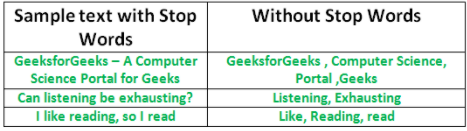

In [44]:
stop_words= stopwords.words('english')
more_stopwords= ['don', 'im', 'o']
stop_words= stop_words + more_stopwords

def remove_stopwords(text):
    text= ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

# Stemming 🛠: 

##  Stemming / Lematization: 

- Pour des raisons grammaticales, les documents utiliseront différentes formes d'un mot, telles que write, writing et writes. De plus, il existe des familles de mots liés par dérivation avec des significations similaires. Le but à la fois de Stemming et de la lemmatisation est de réduire les formes flexionnelles et parfois les formes dérivées d'un mot à une forme de base commune.

### Stemming 
- se réfère généralement à un processus qui coupe les extrémités des mots dans l'espoir d'atteindre le but correctement la plupart du temps et comprend souvent la suppression des affixes dérivatifs.

### Lemmatization: 
- se réfère généralement à faire les choses correctement avec l'utilisation d'un vocabulaire et une analyse morphologique des mots, visant normalement à supprimer uniquement les fins flexionnelles et à renvoyer la forme de base et de dictionnaire d'un mot

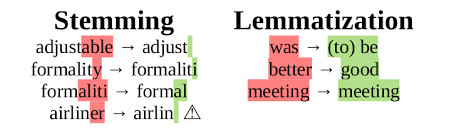

# Stemming algorithms: 
- Il existe plusieurs algorithmes de dérivation implémentés dans la bibliothèque NLTK Python:

- 1) PorterStemmer 
- 2) SnowballStemmers
- 3) LancaterStemmer

In [45]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text= ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text


# Abbreviation 🛠: 

In [46]:
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner", "textcat"])
nlp.max_length = 10000000

In [47]:
# Change the abbreviations by their full value
def abbreviation(text):
    paires = schwartz_hearst.extract_abbreviation_definition_pairs(doc_text=text)
    keys = [k for k, v in paires.items()]
    document = nlp(text)
    words = []
    for token in document:
        if token.text in keys :
            words.append(paires[token.text])
        else:
            words.append(token.text)

    return ' '.join(words)


In [48]:
def remove_contract_form(text):
    document = nltk.word_tokenize(text) 
    words = []
    for token in document:
        text = token
        text = re.sub(r"\'m", "am", text)
        text = re.sub(r"\'re", "are", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"n't", "not", text)
        text = re.sub(r"\'ve", "have", text)
        text = re.sub(r"\'d", "would", text)
        text = re.sub(r"\'ll", "will", text)
        words.append(text)
    return ' '.join(words)

In [49]:
# Remove special characters and bad symbols
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-_]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z ]')
def clean_spec_bad(text):
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    return text

In [50]:
def delete_multiple_space(text):
    return ' '.join(text.split())

In [51]:
# Delete string of length = 1 and not in tags
def low_length(text):
    document = nlp(text)
    words = []
    for token in document:
        if len(token.text) > 1:
            words.append(token.text)
        else:
            if token.text in top:
                words.append(token.text) 
    return ' '.join(words)

In [52]:
def strip_list_noempty(mylist):

    newlist = (item.strip() if hasattr(item, 'strip')
               else item for item in mylist)

    return [item for item in newlist if item != '']

In [53]:
def delete_punctuations(text):
    document= nlp(text)
    words =[token.text for token in document if not token.is_punct ]
    return ' '.join(words)

# initializing string
test_str = "Gfg, is best c# : .net for ! Geeks C++ ;"
def del_punctuations(text):
    document= nlp(text)
    # printing original string
    #print("The original string is : " + text)

    # initializing punctuations string 
    punc = '''!()-[]{};:'"\, <>./?@$%^&*_~'''

    # Removing punctuations in string
    # Using loop + punctuation string
    for ele in document: 
        if ele not in ['.net', '#', 'C++'] and ele in punc:
            #text = text.replace(ele, " ") 
            document= document.replace(ele, " ")

    # printing result 
    #print("The string after punctuation filter : " + text)  
    
    
def clean_punct(text):
    ''' Remove all the punctuation from text, unless it's part of an important
    tag (ex: c++, c#, etc)

    Parameter:

    text: text to remove punctuation from it
    '''

    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)

    for w in words:
        if w in top_tags:
            punctuation_filtered.append(w)
        else:
            w = re.sub('^[0-9]*', " ", w)
            punctuation_filtered.append(regex.sub('', w))

    filtered_list = strip_list_noempty(punctuation_filtered)

    return ' '.join(map(str, filtered_list))

# All Together:

In [54]:
from nltk.tokenize import ToktokTokenizer
from string import punctuation
token = ToktokTokenizer()
punct = punctuation

In [55]:
data_tag['Body_clean'] = data_tag['Body'].apply(clean_text)
data_tag['Title_clean'] = data_tag['Title'].apply(clean_text)
data_tag['Text_clean'] = data_tag['Text'].apply(clean_text)
                                                  
#data_tag['Body_clean']= data_tag['Body_clean'].apply(abbreviation)
#data_tag['Title_clean']= data_tag['Title_clean'].apply(abbreviation)
#data_tag['Text_clean'] = data_tag['Text'].apply(abbreviation)

data_tag['Body_clean']= data_tag['Body_clean'].apply(remove_contract_form)
data_tag['Title_clean']= data_tag['Title_clean'].apply(remove_contract_form)
data_tag['Text_clean'] = data_tag['Text'].apply(remove_contract_form)


data_tag['Body_clean']= data_tag['Body_clean'].apply(remove_stopwords)
data_tag['Title_clean']= data_tag['Title_clean'].apply(remove_stopwords)
data_tag['Text_clean'] = data_tag['Text'].apply(remove_stopwords)


data_tag['Body_clean']= data_tag['Body_clean'].apply(clean_spec_bad)
data_tag['Title_clean']= data_tag['Title_clean'].apply(clean_spec_bad)
data_tag['Text_clean'] = data_tag['Text'].apply(clean_spec_bad)


data_tag['Body_clean']= data_tag['Body_clean'].apply(delete_multiple_space)
data_tag['Title_clean']= data_tag['Title_clean'].apply(delete_multiple_space)
data_tag['Text_clean'] = data_tag['Text'].apply(delete_multiple_space)


data_tag['Body_clean']= data_tag['Body_clean'].apply(low_length)
data_tag['Title_clean']= data_tag['Title_clean'].apply(low_length)
data_tag['Text_clean'] = data_tag['Text'].apply(low_length)


data_tag['Body_clean']= data_tag['Body_clean'].apply(stemm_text)
data_tag['Title_clean']= data_tag['Title_clean'].apply(stemm_text)
data_tag['Text_clean'] = data_tag['Text'].apply(stemm_text)


data_tag['Body_clean'] = data_tag['Body_clean'].apply(lambda x: clean_punct(x))
data_tag['Title_clean'] = data_tag['Title_clean'].apply(lambda x: clean_punct(x))
data_tag['Text_clean'] = data_tag['Text_clean'].apply(lambda x: clean_punct(x))

In [56]:
data_tag.head()

,Body,Title,Tags,Text,id,Tags_len,Body_clean,Title_clean,Text_clean
0,I found an example in the VS2008 Examples for ...,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,[c#],dynamic linq orderby on ienumerable / iqueryab...,0,3,found exampl exampl dynam linq allow use sql l...,dynam linq orderbi ienumer iquery,dynam linq orderbi on ienumer iqueryablei foun...
1,RequireJS seems to do something internally tha...,Prevent RequireJS from Caching Required Scripts,"[javascript, jquery]",prevent requirejs from caching required script...,1,3,requirej seem someth intern cach requir javasc...,prevent requirej cach requir script,prevent requirej from cach requir scriptsrequi...
3,What is the best way to get IDENTITY of insert...,Best way to get identity of inserted row?,[sql],best way to get identity of inserted row?_what...,3,3,best way get ident insert row know ident ident...,best way get ident insert row,best way to get ident of insert rowwhat is the...
4,I am trying to synchronise a project that I ha...,How do you synchronise projects to GitHub with...,[android],how do you synchronise projects to github with...,4,4,tri synchronis project android studio folder g...,synchronis project github android studio,how do you synchronis project to github with a...
5,"Given a string of JSON data, how can I safely ...",Safely turning a JSON string into an object,[javascript],safely turning a json string into an object_gi...,5,3,given string json data safe turn string javasc...,safe turn json string object,safe turn a json string into an objectgiven a ...


In [57]:
data_tag.shape

(8763, 9)

In [58]:
q = data_tag["Text"].to_list()
l = data_tag["Text_clean"].to_list()

for i in range(0,4):
    print('Question title '+str(i+1)+': '+q[i])
    print('****************************************************************************************************')
    print('Question title '+str(i+1)+': '+l[i])
    print('****************************************************************************************************')


Question title 1: dynamic linq orderby on ienumerable / iqueryable_i found an example in the vs2008 examples for dynamic linq that allows you to use a sql-like string (e.g. orderby("name, age desc")) for ordering. unfortunately, the method included only works on iqueryable<t>. is there any way to get this functionality on ienumerable<t>?

****************************************************************************************************
Question title 1: dynam linq orderbi on ienumer iqueryablei found an exampl in the vs2008 exampl for dynam linq that allow you to use a sqllike string eg orderby name age desc for ordering unfortunately the method includ onli work on iqueryablet is there ani way to get this function on ienumerablet
****************************************************************************************************
Question title 2: prevent requirejs from caching required scripts_requirejs seems to do something internally that caches required javascript files. if i make

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Tokens visualization 📊</h2>
</div>

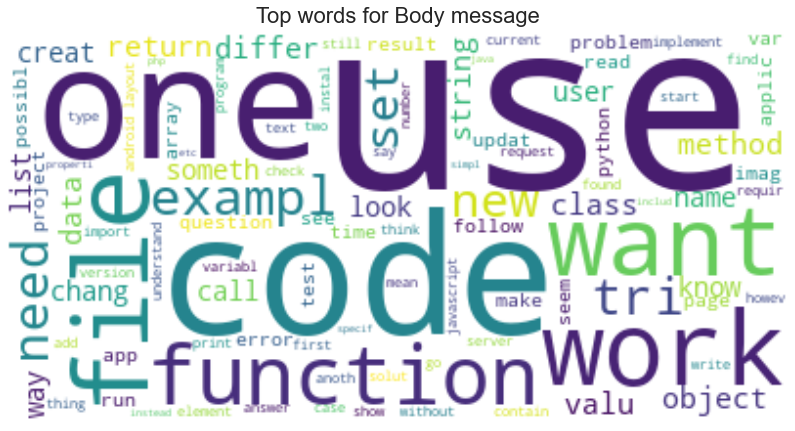

In [59]:
wc = WordCloud(
    background_color='white', 
    max_words=100, 
)
wc.generate(' '.join(text for text in data_tag['Body_clean']))
plt.figure(figsize=(14,8))
plt.title('Top words for Body message', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

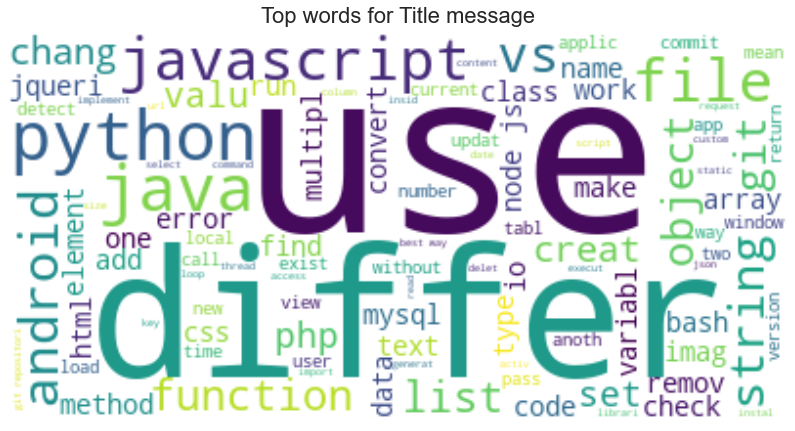

In [60]:
wc = WordCloud(
    background_color='white', 
    max_words=100, 
)
wc.generate(' '.join(text for text in data_tag['Title_clean']))
plt.figure(figsize=(14,8))
plt.title('Top words for Title message', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Inspecting our dataset a little more: 

In [61]:
from nltk.tokenize import RegexpTokenizer

tokenizer = nltk.RegexpTokenizer(r'\w+')
data_tag["Body_tokens"]= data_tag["Body_clean"].apply(tokenizer.tokenize)
data_tag.head()

,Body,Title,Tags,Text,id,Tags_len,Body_clean,Title_clean,Text_clean,Body_tokens
0,I found an example in the VS2008 Examples for ...,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,[c#],dynamic linq orderby on ienumerable / iqueryab...,0,3,found exampl exampl dynam linq allow use sql l...,dynam linq orderbi ienumer iquery,dynam linq orderbi on ienumer iqueryablei foun...,"[found, exampl, exampl, dynam, linq, allow, us..."
1,RequireJS seems to do something internally tha...,Prevent RequireJS from Caching Required Scripts,"[javascript, jquery]",prevent requirejs from caching required script...,1,3,requirej seem someth intern cach requir javasc...,prevent requirej cach requir script,prevent requirej from cach requir scriptsrequi...,"[requirej, seem, someth, intern, cach, requir,..."
3,What is the best way to get IDENTITY of insert...,Best way to get identity of inserted row?,[sql],best way to get identity of inserted row?_what...,3,3,best way get ident insert row know ident ident...,best way get ident insert row,best way to get ident of insert rowwhat is the...,"[best, way, get, ident, insert, row, know, ide..."
4,I am trying to synchronise a project that I ha...,How do you synchronise projects to GitHub with...,[android],how do you synchronise projects to github with...,4,4,tri synchronis project android studio folder g...,synchronis project github android studio,how do you synchronis project to github with a...,"[tri, synchronis, project, android, studio, fo..."
5,"Given a string of JSON data, how can I safely ...",Safely turning a JSON string into an object,[javascript],safely turning a json string into an object_gi...,5,3,given string json data safe turn string javasc...,safe turn json string object,safe turn a json string into an objectgiven a ...,"[given, string, json, data, safe, turn, string..."


In [62]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical 


all_words= [ word for tokens in data_tag["Body_tokens"] for word in tokens]
sentence_lengths= [len(tokens) for tokens in data_tag['Body_tokens']]
VOCAB= sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s"% (len(all_words), len(VOCAB)))
print(" Max sentence length is %s"% max(sentence_lengths))

Using TensorFlow backend.


518742 words total, with a vocabulary size of 25441
 Max sentence length is 1753


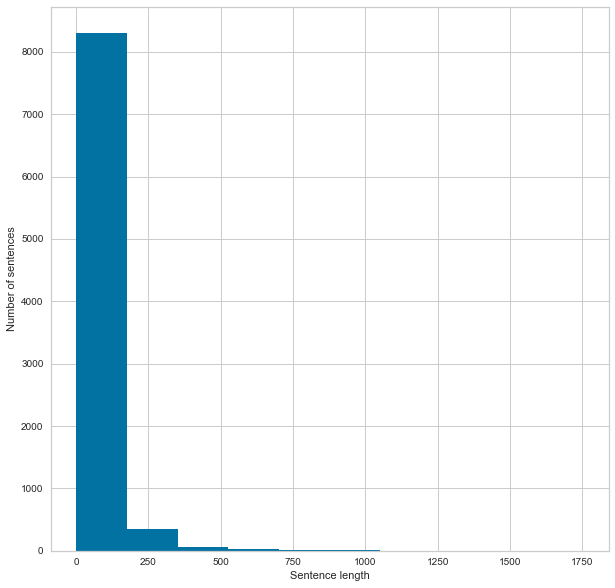

In [63]:
fig= plt.figure(figsize=(10, 10))
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Save the new Dataset</h2>
</div>

In [64]:
data_tag.to_csv("data_tagged", index=False)

In [65]:
P_text=data_tag['Text_clean']
P_text

0        dynam linq orderbi on ienumer iqueryablei foun...
1        prevent requirej from cach requir scriptsrequi...
3        best way to get ident of insert rowwhat is the...
4        how do you synchronis project to github with a...
5        safe turn a json string into an objectgiven a ...
                               ...                        
11928    react function stateless component purecompone...
11930    how to creat a directori if it doesn t exist u...
11931    error eacces permiss denied access usrlocallib...
11932    how do i condit appli css style in angularjsq1...
11933    android locationmanag vs googl play servicesi ...
Name: Text_clean, Length: 8763, dtype: object

In [66]:
P_top_200tags = data_tag['Tags']
P_top_200tags

0                        [c#]
1        [javascript, jquery]
3                       [sql]
4                   [android]
5                [javascript]
                 ...         
11928            [javascript]
11930               [node.js]
11931               [node.js]
11932                   [css]
11933               [android]
Name: Tags, Length: 8763, dtype: object

In [67]:
P_text.to_pickle("./P_text.pkl")
P_top_200tags.to_pickle("./P_top_200tags.pkl")

# MultiLabelBinarizer: 

In [68]:
multilabel_binarizer = MultiLabelBinarizer()
y_target = multilabel_binarizer.fit_transform(data_tag['Tags'])
y_target

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [69]:
x= data_tag['Text_clean']
y= y_target

In [72]:
# SAUVEGARDE
with open('x.pkl', 'wb') as f:
    pickle.dump(x, f)
    
# SAUVEGARDE
with open('y.pkl', 'wb') as f:
    pickle.dump(y, f)    
    
# SAUVEGARDE
with open('data_tags.pkl', 'wb') as f:
    pickle.dump(data_tag['Tags'], f)    
    
   
    


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Vectorization</h2>
</div>

- Actuellement, nous avons les messages sous forme de listes de tokens (également appelés lemmes) et nous devons maintenant convertir chacun de ces messages en un vecteur avec lequel les modèles d'algorithme de SciKit Learn peuvent fonctionner.
>  Nous le ferons en trois étapes en utilisant le modèle du bag_of_words:
- Comptez combien de fois un mot apparaît dans chaque message (connu sous le nom de fréquence des termes)
- Pesez les décomptes, de sorte que les tokens fréquents aient moins de poids (fréquence de document inverse)
- Normaliser les vecteurs à la longueur unitaire, pour faire abstraction de la longueur du texte d'origine (norme L2)


- Chaque vecteur aura autant de dimensions qu'il y a de mots uniques dans le corpus SMS. Nous allons d'abord utiliser CountVectorizer de SciKit Learn. Ce modèle convertira une collection de documents texte en une matrice de nombres de tokens.

- Nous pouvons imaginer cela comme une matrice à 2 dimensions. Où la dimension 1 est le vocabulaire complet (1 ligne par mot) et l'autre dimension sont les documents réels, dans ce cas une colonne par message texte.
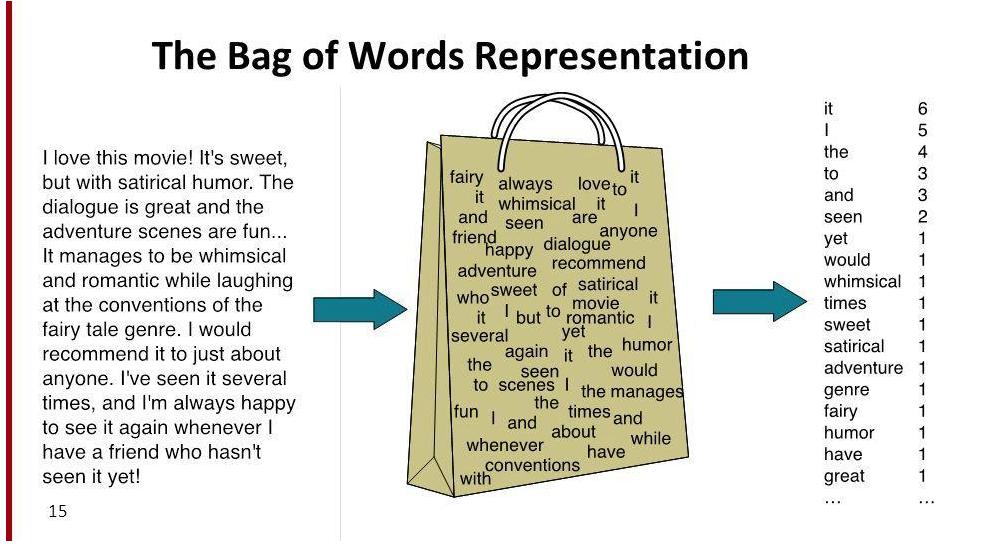

In [194]:
# Define X nad y for use with CounterVectorizer 

# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer()
# use the trained to create a document term matrix from train and test sets 
X_BOW= vect.fit_transform(x)
X_BOW

<8763x50297 sparse matrix of type '<class 'numpy.int64'>'
	with 517974 stored elements in Compressed Sparse Row format>

# Tunning CountVectorizer: 
- Les paramètres de CountVectorizer: 

- 1) stop_words: Étant donné que CountVectorizer ne compte que les occurrences de chaque mot dans son vocabulaire, des mots extrêmement courants tels que «le», «et», etc. deviendront des caractéristiques très importantes tout en ajoutant peu de sens au texte. Votre modèle peut souvent être amélioré si vous ne tenez pas compte de ces mots. Les mots vides ne sont qu'une liste de mots que vous ne souhaitez pas utiliser comme fonctionnalités. Vous pouvez définir le paramètre stop_words = ’english’ pour utiliser une liste intégrée. Vous pouvez également définir stop_words comme une liste personnalisée. Ce paramètre est défini par défaut a None.

- 2) ngram_range: Un n-gramme est juste une chaîne de n mots d'affilée. Définissez le paramètre ngram_range = (a, b) où a est le minimum et b est la taille maximale des ngrams que vous souhaitez inclure dans vos entités. La valeur par défaut ngram_range est (1,1).

- 3) min_df, max_df: Ce sont les fréquences minimales et maximales du document que les mots / n-grammes doivent avoir pour être utilisés comme caractéristiques. Si l'un de ces paramètres est défini sur des nombres entiers, ils seront utilisés comme limites du nombre de documents dans lesquels chaque entité doit se trouver pour être considérée comme une entité. Si l'un ou l'autre est défini sur un flottant, ce nombre sera interprété comme une fréquence plutôt que comme une limite numérique. min_df par défaut à 1 (int) et max_df à 1.0 (float).

- 4) max_features: Ce paramètre est assez explicite. Le CountVectorizer choisira les mots / caractéristiques les plus fréquents dans son vocabulaire et supprimera tout le reste.



In [195]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

# TF_IDF: 
- Dans la recherche d'informations, tf – idf, TF-IDF ou TFIDF, abréviation de terme  short for term frequency–inverse document frequency, est une statistique numérique destinée à refléter l'importance d'un mot pour un document dans une collection ou un corpus. Elle est souvent utilisée comme facteur de pondération dans les recherches de information retrieval, text mining, and user modeling. La valeur tf – idf augmente proportionnellement au nombre de fois où un mot apparaît dans le document et est compensée par le nombre de documents du corpus qui contiennent le mot, ce qui permet d'ajuster le fait que certains mots apparaissent plus fréquemment en général.

## tf_idf: 
- Est l'un des schémas de pondération des termes les plus populaires aujourd'hui. Une enquête menée en 2015 a montré que 83% des systèmes de recommandation basés sur du texte dans les bibliothèques numériques utilisent tf – idf.

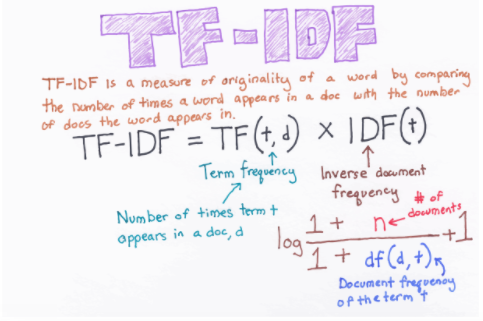

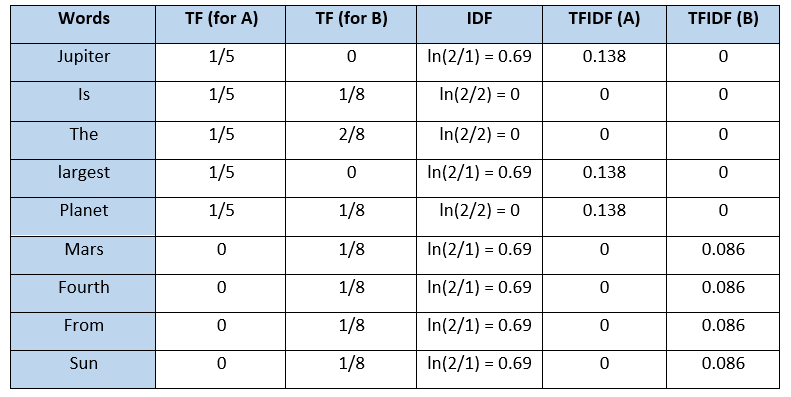

In [196]:
from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_transformer = TfidfTransformer()

#tfidf_transformer.fit(x_train_dtm)
#x_train_tfidf = tfidf_transformer.transform(x_train_dtm)
#x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

#x_train_tfidf
vectorizerIdf = TfidfVectorizer(analyzer='word',
                                    min_df=0.01,
                                    max_df=0.7,
                                    strip_accents=None,
                                    encoding='utf-8',
                                    preprocessor=None,
                                    token_pattern=r'(?u)\b\w+\b',
                                    # token_pattern=r"(?u)\S\S+",
                                    max_features=2000) 
X_IDF= vectorizerIdf.fit_transform(x)
X_IDF

<8763x814 sparse matrix of type '<class 'numpy.float64'>'
	with 360674 stored elements in Compressed Sparse Row format>

# Word Embeddings: GloVe

- Nous devons effectuer une tokenisation - le traitement de la segmentation du texte en phrases de mots. L'avantage de la tokenisation est qu'elle obtient le texte dans un format qui est plus facile à convertir en nombres bruts, qui peuvent en fait être utilisés pour le traitement.
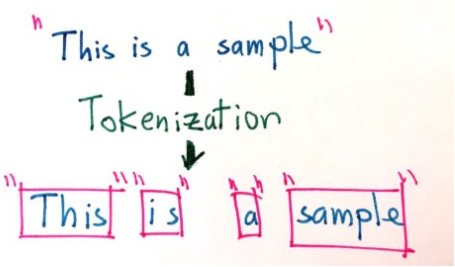

# GloVe: 
- La méthode GloVe repose sur une idée importante
> Vous pouvez dériver des relations sémantiques entre les mots à partir de la matrice de cooccurrence.

- Pour obtenir une représentation vectorielle des mots, nous pouvons utiliser un algorithme d'apprentissage non supervisé appelé GloVe (Global Vectors for Word Representation), qui se concentre sur les cooccurrences de mots sur l'ensemble du corpus. Ses plongements concernent les probabilités que deux mots apparaissent ensemble.

- Word embeddings est essentiellement une forme de représentation de mots qui relie la compréhension humaine du langage à celle d'une machine. Ils ont appris des représentations de texte dans un espace à n dimensions où les mots qui ont la même signification ont une représentation similaire. Cela signifie que deux mots similaires sont représentés par des vecteurs presque similaires qui sont très étroitement placés dans un espace vectoriel.

- Ainsi, lors de l'utilisation de Word embeddings, tous les mots individuels sont représentés comme des vecteurs à valeur réelle dans un espace vectoriel prédéfini. Chaque mot est mappé à un vecteur et les valeurs vectorielles sont apprises d'une manière qui ressemble à un réseau neuronal.
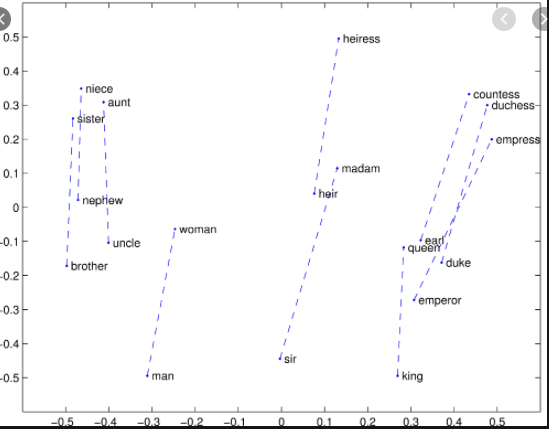

In [203]:
embeddings_dictionary = dict()
embedding_dim = 50
# Glove 50D est un modele pri-entrainé 
# Load GloVe 50D embeddings 
with open('C:/Users/PC/python/OpenClassrooms/Projet5/glove.6B.50d.txt', 'r', encoding='utf-8') as fp:
    for line in fp:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

#embeddings_dictionary

In [204]:
vocab = set()
for sents in x:
  docu = nlp(sents)
  for token in docu:
    vocab.add(token.text)

embeddings_dict = {}
for k, v in embeddings_dictionary.items():
  if k in vocab:
    embeddings_dict[k] = v

In [205]:
len(embeddings_dict)

11548

In [206]:
documents = []
for sent in x:
    document = nlp(sent)
    documents.append([token.text for token in document])

In [207]:
X_Glove = []
for sents in documents:
    vec = np.array([0]*50)
    for token in sents:
        nb = 0
        if token in list(embeddings_dict.keys()):
            vec = vec + embeddings_dict[token]
            nb += 1
    if nb != 0:
        vec = vec / nb
    X_Glove.append(vec)

In [208]:
X_Glove=np.array(X_Glove)
X_Glove

array([[ 13.6105843 ,   1.70032291,  -2.56146128, ...,   1.91948399,
          0.78811493,   0.85176826],
       [ 54.4224796 ,   6.03771824,   6.64323853, ...,  14.02785315,
         -4.90132254,  -0.25956214],
       [  9.29082602,   5.56128203,  -0.16732215, ...,   1.48356491,
         -1.03206192,   5.73986308],
       ...,
       [ 18.17562694, -16.33959785,  -8.5228509 , ...,  15.39895121,
         25.46341863,   0.72505906],
       [ 30.78354321,   8.85528092,   5.55648374, ...,   5.81958281,
          9.0425022 ,   8.01324551],
       [ 44.33905065,  15.15239297,   1.85691395, ...,  -8.95179279,
         -1.18060814,   1.56353827]])


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Modelisation</h2>
</div>

In [ ]:
def avg_jaccard(y_true, y_pred):
    ''' It calculates Jaccard similarity coefficient score for each instance,and
    it finds their average in percentage

    Parameters:

    y_true: truth labels
    y_pred: predicted labels
    '''
    jacard = np.minimum(y_true, y_pred).sum(axis=1) / \
        np.maximum(y_true, y_pred).sum(axis=1)

    return jacard.mean()*100

In [197]:

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/float(len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union
def avg_jaccard(y_true, y_pred):
    ''' It calculates Jaccard similarity coefficient score for each instance,and
    it finds their average in percentage

    Parameters:

    y_true: truth labels
    y_pred: predicted labels
    '''
    jacard = np.minimum(y_true, y_pred).sum(axis=1) / \
        np.maximum(y_true, y_pred).sum(axis=1)

    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
     # Hamming loss (smaller is better)
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)))
   # print("Hamming score: {}".format(hamming_score(y_pred, y_test)))
    print("jaccard_score: {}".format(jaccard_score(y_pred,y_test, average='samples')))
    print("---")  
    
    
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    #print("avg_jaccard score: {}".format(avg_jaccard(y_test, y_pred)))
    print("Jaccard score: {}".format(jaccard_score(y_pred,y_test, average='samples')*100))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("Weighted F1 score: {}".format(f1_score(y_test, y_pred, average='weighted')))
    print("Macro F1 score: {}".format(f1_score(y_test, y_pred, average='macro')))
    print("Micro F1 score: {}".format(f1_score(y_test, y_pred, average='micro')))
    #print("multilabel_confusion_matrix: {}".format(multilabel_confusion_matrix(y_test, y_pred)))
    print(format(classification_report(y_test, y_pred)))
    print("---")
    


# TF, GridSearch , kfold, OneVsRestCalssifier:

In [96]:
X_BOW = X_BOW.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X_BOW,
                                                    y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7010, 50297), (1753, 50297), (7010, 20), (1753, 20))

Best hyperparameters sur le training set: {'estimator__C': 10, 'estimator__penalty': 'l1'}
jaccard score :  65.23418925344745


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

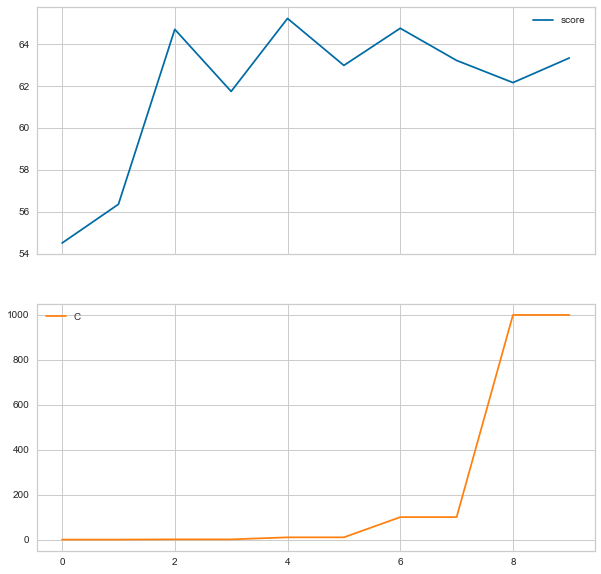

In [97]:
model= LogisticRegression(solver='liblinear', random_state=42)
ovr= OneVsRestClassifier(model)
params= {'estimator__penalty': ['l1', 'l2'],
         'estimator__C': [0.1, 1, 10, 100, 1000]}
# le nombre de split 
kfold= KFold(n_splits=5, shuffle=True, random_state=0)

grid= GridSearchCV(ovr, params, cv= kfold, scoring= make_scorer(avg_jaccard, greater_is_better=True))
# fit the model 
grid.fit(X_train, y_train)
# Evaluate a score by cross-validation
Evaluate_score= cross_val_score(grid, X=X_train, y=y_train, cv=kfold)

print("Best hyperparameters sur le training set:", grid.best_params_)
print("jaccard score : ", Evaluate_score.mean())
grid_df = pd.DataFrame(np.transpose([grid.cv_results_['mean_test_score'],
                                       grid.cv_results_['param_estimator__C'].data]),
                         columns=['score', 'C'])

grid_df.plot(subplots=True, figsize=(10, 10))


In [98]:
grid.best_estimator_

OneVsRestClassifier(estimator=LogisticRegression(C=10, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear'))

In [99]:
test_jaccard = []
train_jaccard = []

for s in np.linspace(0, 1, 10, dtype='float'):

    y_train_pred = pd.DataFrame(grid.best_estimator_.predict_proba(
        X_train)).applymap(lambda x: 1 if x > s else 0).to_numpy()
    train_jaccard.append(jaccard_score(
        y_train, y_train_pred, average='weighted'))
    y_test_pred = pd.DataFrame(grid.best_estimator_.predict_proba(
        X_test)).applymap(lambda x: 1 if x > s else 0).to_numpy()
    test_jaccard.append(jaccard_score(
        y_test, y_test_pred, average='weighted'))

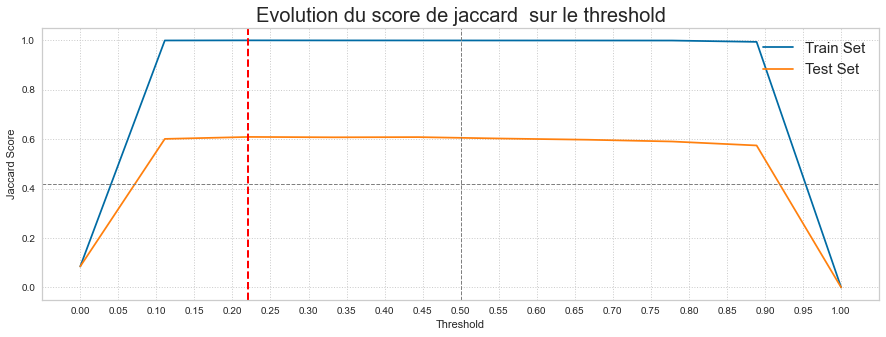

In [100]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.style.use('tableau-colorblind10') 
plt.title("Evolution du score de jaccard  sur le threshold", fontsize=20)
plt.xlabel("Threshold")
plt.ylabel("Jaccard Score")
ax_train = ax.plot(np.linspace(0, 1, 10, dtype='float'), train_jaccard)
ax_test = ax.plot(np.linspace(0, 1, 10, dtype='float'), test_jaccard)
ax.axhline(y=0.42, color='gray', linestyle='--', lw=1)
ax.axvline(x=0.5, color='gray', linestyle='--', lw=1)
ax.axvline(x=0.22, color='red', linestyle='--', lw=2)
plt.xticks(np.arange(0, 1.05, 0.05))
ax.legend((ax_train[0], ax_test[0]), ('Train Set', 'Test Set'), fontsize=15)
ax.grid(True, linestyle=":")
plt.show()

In [101]:
y_pred1 = pd.DataFrame(grid.best_estimator_.predict_proba(X_test)).applymap(lambda x: 1 if x > 0.5 else 0).to_numpy()
y_pred2 = pd.DataFrame(grid.best_estimator_.predict_proba(X_test)).applymap(lambda x: 1 if x > 0.22 else 0).to_numpy()
y_true = pd.Series(multilabel_binarizer.inverse_transform(y_test))
y_pred1 = pd.Series(multilabel_binarizer.inverse_transform(y_pred1))
y_pred2 = pd.Series(multilabel_binarizer.inverse_transform(y_pred2))
display(pd.concat([y_true.rename('y_true'), y_pred1.rename(
    'y_pred_0.5'), y_pred2.rename('y_pred_0.22')], axis=1)[:20])

,y_true,y_pred_0.5,y_pred_0.22
0,"(c#,)",(),()
1,"(android,)","(android,)","(android,)"
2,"(css, html)","(css, html)","(css, html)"
3,"(node.js,)","(node.js,)","(node.js,)"
4,"(python,)","(python,)","(python,)"
5,"(c, c++)","(c, c++)","(c, c++)"
6,"(.net, c#, python)","(python,)","(python,)"
7,"(javascript,)","(javascript,)","(javascript,)"
8,"(python,)","(javascript,)","(javascript,)"
9,"(c, ios, objective-c)",(),"(objective-c, python, string)"


# TF-IDF GridSearch, kfold, OneVsRestClassifier:

In [219]:
X_idf = X_IDF.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X_idf,
                                                    y, test_size = 0.2, random_state = 0)

Best hyperparameters sur le training set: {'estimator__C': 10, 'estimator__penalty': 'l1'}
jaccard score :  60.41084165477889


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

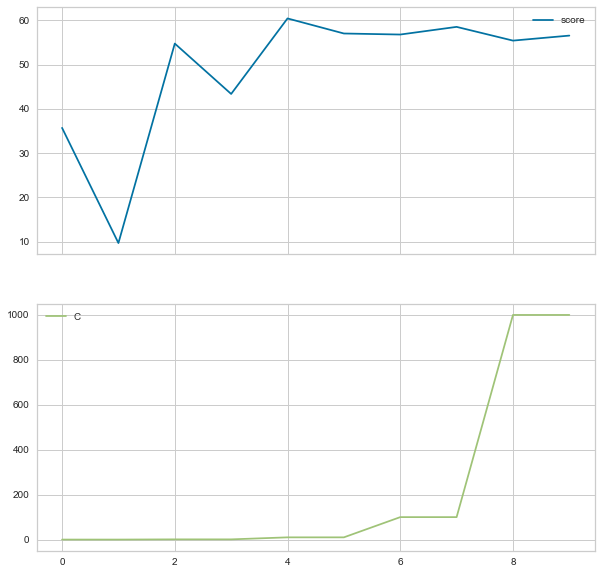

In [220]:
model= LogisticRegression(solver='liblinear', random_state=42)
ovr= OneVsRestClassifier(model)
params= {'estimator__penalty': ['l1', 'l2'],
         'estimator__C': [0.1, 1, 10, 100, 1000]}
# le nombre de split 
kfold= KFold(n_splits=5, shuffle=True, random_state=0)

grid= GridSearchCV(ovr, params, cv= kfold, scoring= make_scorer(avg_jaccard, greater_is_better=True))
# fit the model 
grid.fit(X_train, y_train)
# Evaluate a score by cross-validation
Evaluate_score= cross_val_score(grid, X=X_train, y=y_train, cv=kfold)

print("Best hyperparameters sur le training set:", grid.best_params_)
print("jaccard score : ", Evaluate_score.mean())
grid_df = pd.DataFrame(np.transpose([grid.cv_results_['mean_test_score'],
                                       grid.cv_results_['param_estimator__C'].data]),
                         columns=['score', 'C'])

grid_df.plot(subplots=True, figsize=(10, 10))


In [221]:
grid.best_estimator_

OneVsRestClassifier(estimator=LogisticRegression(C=10, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear'))

In [222]:
test_jaccard = []
train_jaccard = []

for s in np.linspace(0, 1, 10, dtype='float'):

    y_train_pred = pd.DataFrame(grid.best_estimator_.predict_proba(
        X_train)).applymap(lambda x: 1 if x > s else 0).to_numpy()
    train_jaccard.append(jaccard_score(
        y_train, y_train_pred, average='weighted'))
    y_test_pred = pd.DataFrame(grid.best_estimator_.predict_proba(
        X_test)).applymap(lambda x: 1 if x > s else 0).to_numpy()
    test_jaccard.append(jaccard_score(
        y_test, y_test_pred, average='weighted'))

In [223]:
train_jaccard

[0.08490817196066112,
 0.695809048000677,
 0.8175172123930787,
 0.852050223080395,
 0.8396130324417553,
 0.7926760934697771,
 0.7196277293047864,
 0.6411085640563567,
 0.5462821630014398,
 0.0]

In [92]:
test_jaccard

[0.08508989959210633,
 0.491719982519815,
 0.5276904754869224,
 0.5479563026411667,
 0.5442445937068898,
 0.545640805224448,
 0.5392322387479721,
 0.525527426419359,
 0.4830706971344552,
 0.0]

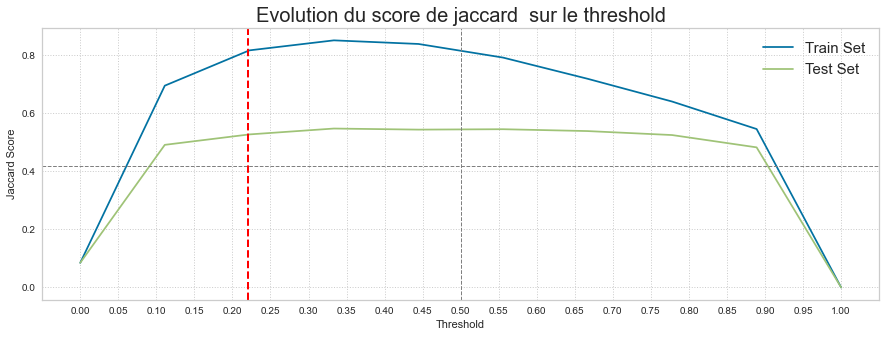

In [224]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.style.use('tableau-colorblind10') 
plt.title("Evolution du score de jaccard  sur le threshold", fontsize=20)
plt.xlabel("Threshold")
plt.ylabel("Jaccard Score")
ax_train = ax.plot(np.linspace(0, 1, 10, dtype='float'), train_jaccard)
ax_test = ax.plot(np.linspace(0, 1, 10, dtype='float'), test_jaccard)
ax.axhline(y=0.42, color='gray', linestyle='--', lw=1)
ax.axvline(x=0.5, color='gray', linestyle='--', lw=1)
ax.axvline(x=0.22, color='red', linestyle='--', lw=2)
plt.xticks(np.arange(0, 1.05, 0.05))
ax.legend((ax_train[0], ax_test[0]), ('Train Set', 'Test Set'), fontsize=15)
ax.grid(True, linestyle=":")
plt.show()

In [225]:
y_pred1 = pd.DataFrame(grid.best_estimator_.predict_proba(X_test)).applymap(lambda x: 1 if x > 0.5 else 0).to_numpy()
y_pred2 = pd.DataFrame(grid.best_estimator_.predict_proba(X_test)).applymap(lambda x: 1 if x > 0.22 else 0).to_numpy()
y_true = pd.Series(multilabel_binarizer.inverse_transform(y_test))
y_pred1 = pd.Series(multilabel_binarizer.inverse_transform(y_pred1))
y_pred2 = pd.Series(multilabel_binarizer.inverse_transform(y_pred2))
display(pd.concat([y_true.rename('y_true'), y_pred1.rename(
    'y_pred_0.5'), y_pred2.rename('y_pred_0.22')], axis=1)[20:40])

,y_true,y_pred_0.5,y_pred_0.22
20,"(css, git, html)","(css, html, javascript)","(css, html, javascript)"
21,"(java,)","(c++,)","(c++, java)"
22,"(c, c++)","(c, objective-c)","(c, c++, ios, objective-c)"
23,"(git,)","(git,)","(git,)"
24,"(mysql, python)","(python,)","(python,)"
25,"(java,)","(java,)","(android, java)"
26,"(git,)","(git,)","(git,)"
27,"(css,)","(css, html)","(css, html)"
28,"(objective-c,)","(.net, c#)","(.net, c#)"
29,"(mysql, php)","(mysql,)","(mysql, python)"


La modification du seuil sur un échantillon tiré aléatoirement a un impact , le modèle est plus enclin à proposer un tag pour un seuil à 0.5 contrairement au seuil à 0.22, sans pour autant que le ou les tags proposés ne soient pas pertinents.

# Confusion matrix:

In [226]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Reds):
    ''' This function prints and plots a normalized confusion matrix.

  Parameters:

      cm : the confusion matrix 
      classes (list): the labels to diplay on the graph
      title (string): the title of the confusion matrix plot

  '''

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, bbox={"pad": 3, 'alpha': 0.5,
                           "facecolor": 'blue'}, size=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

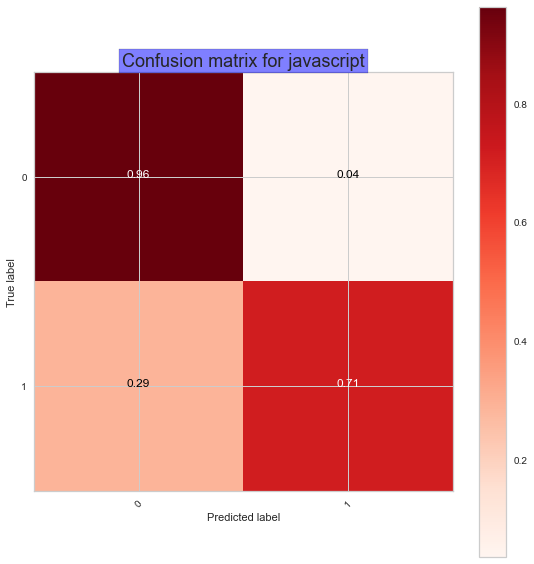

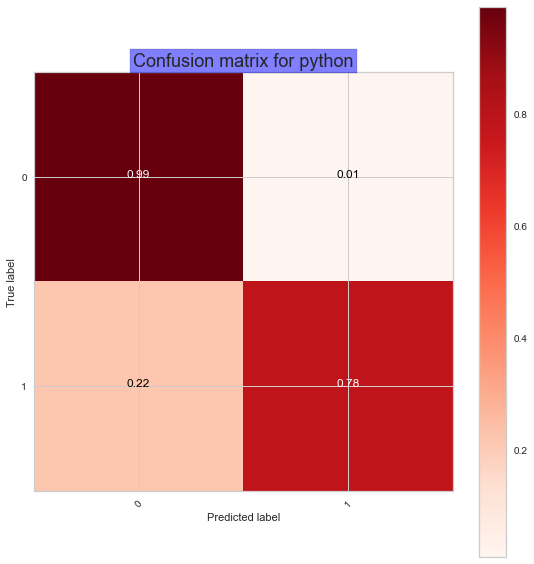

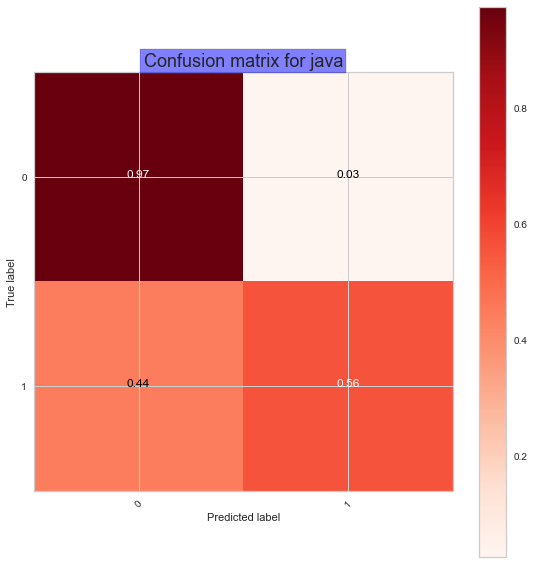

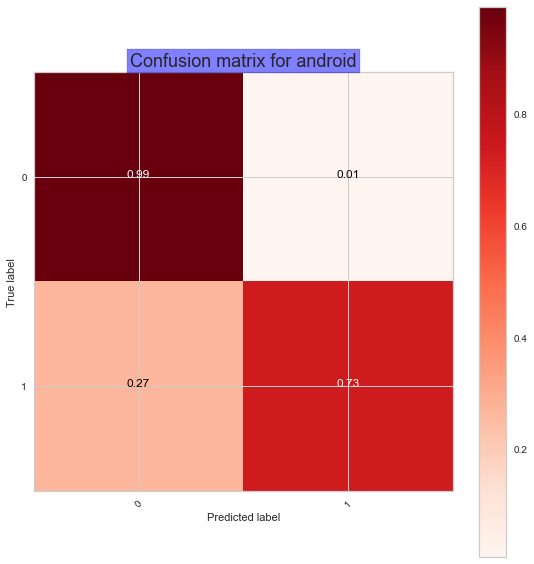

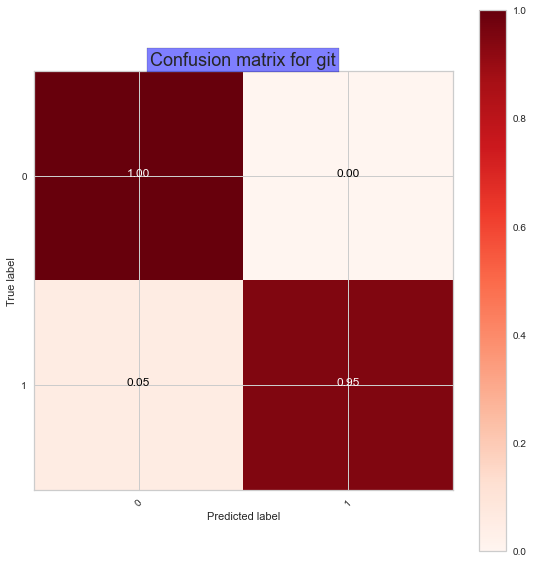

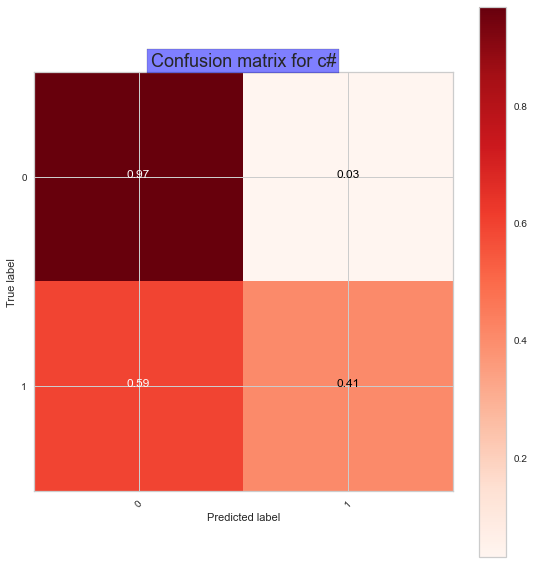

In [227]:
# Confusion matrix of the OneVersusRest Classifier for different tags
for i in range(6):
    top_tag = np.where(multilabel_binarizer.classes_ == top_tags[i])[0]

    tag = (multilabel_binarizer.classes_[top_tag])
    y_pred = grid.predict(X_test)
    cnf_matrix = confusion_matrix(y_test[:, top_tag], y_pred[:, top_tag])
    plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                          title='Confusion matrix for %s' % tag[0])
    print("")

# There is no difference concerning the performance of OVR, for predicting
# the different tags (popular or not)

In [228]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='lanczos', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


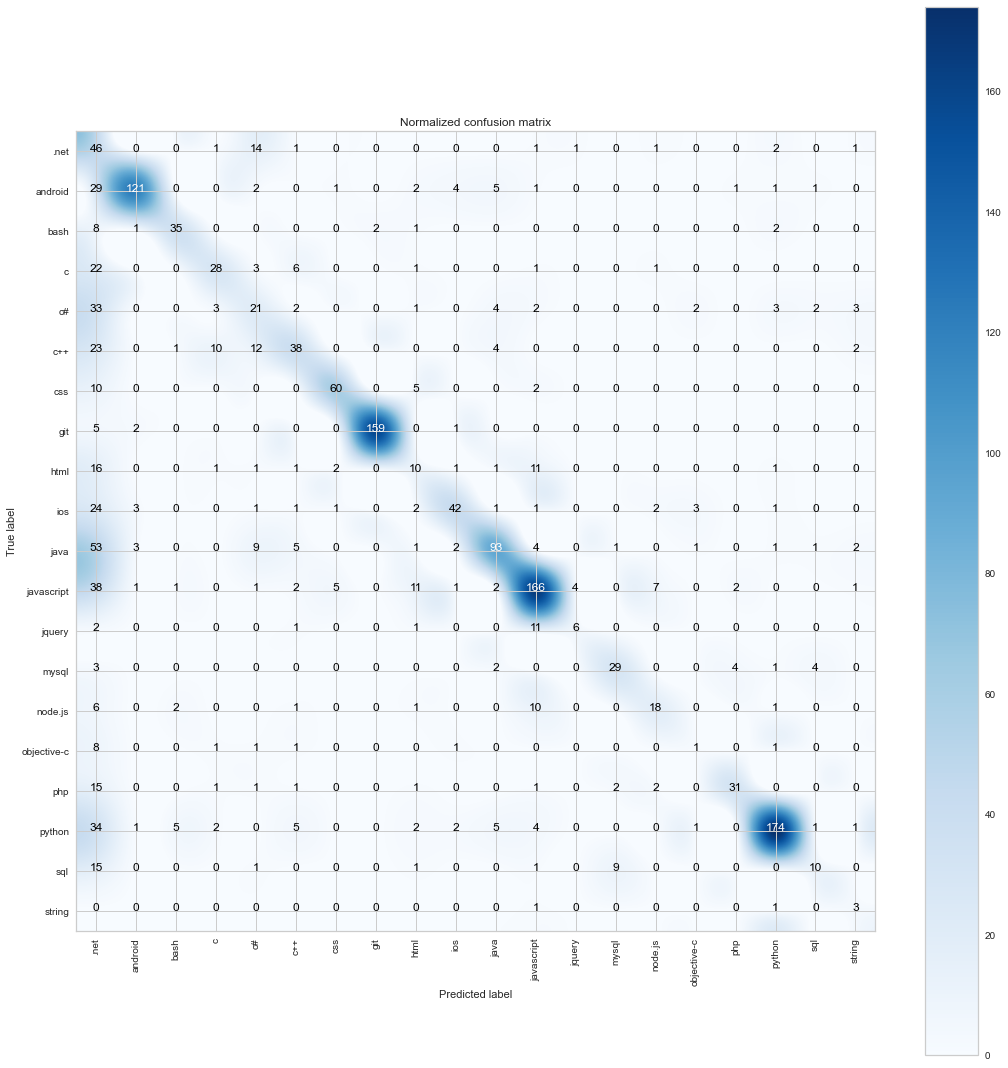

In [233]:
label_names = multilabel_binarizer.classes_
y_pred = grid.predict(X_test)
cnf_matrix = confusion_matrix(
    np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(15, 15, forward=True)
fig.align_labels()

fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=False,
                      title='Normalized confusion matrix')

# Pad Sequence with  LSTM:
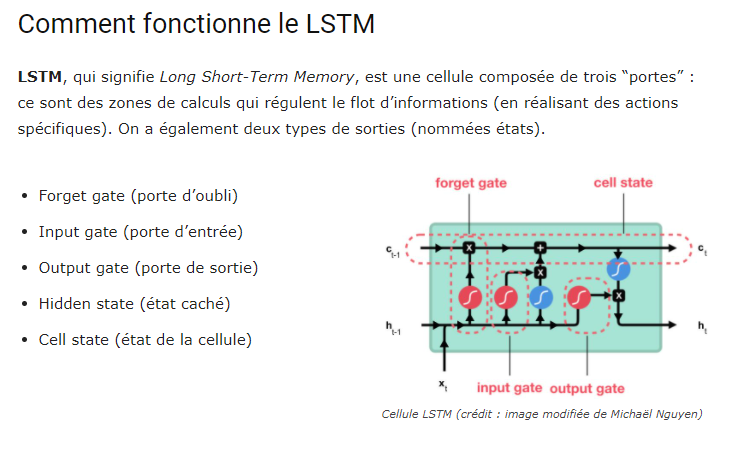


Ces opérations (addition, multiplication, sigmoide, Tanh, concatenation) dans les portes permettent au LSTM de conserver ou supprimer des informations qu’il a en mémoire. Par exemple, dans notre phrase “Hier soir j’ai mangé un hamburger et des”, il est important de retenir les mots “hamburger” et “manger” tandis que les déterminants “un”, “et” peuvent être oubliés par le réseau.

In [209]:
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [210]:
texts = data_tag['Text_clean']
target =  y_target

In [211]:
embedding_dim = 100
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

50475

In [212]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.
embedding_dim = 50
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61971998, -0.088813  , -1.02199996, ..., -0.70181   ,
         0.11894   ,  0.70333999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#sequence = [[1], [2, 3], [4, 5, 6]]
#tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

In [215]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[ 551, 1239, 5603, ...,    0,    0,    0],
       [ 817, 4763,   28, ...,    0,    0,    0],
       [ 162,   41,    2, ...,    0,    0,    0],
       ...,
       [  64, 2744, 1103, ...,    0,    0,    0],
       [  14,   15,    3, ...,    0,    0,    0],
       [  43, 8072,  251, ...,    0,    0,    0]])

In [234]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.30
)
len(X_train), len(X_test), len(y_train), len(y_test)

(6134, 2629, 6134, 2629)

In [235]:
# Model from https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm/data

def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()
    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1887, 50)          2523750   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1887, 3774)        29256048  
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 3774)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 3774)              15096     
_________________________________________________________________
dropout_7 (Dropout)          (None, 3774)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1887)              7123425   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1887)             

In [ ]:
# Load the model and train!!

model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 1,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

# Lets see the results: 

In [ ]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Unsupervised Learning</h2>
</div>

In [95]:
!pip install pyLDAvis
!pip install - U gensim

ERROR: Invalid requirement: '-'


In [96]:
import pyLDAvis.sklearn
import gensim


## Latent Dirichilet Allocation:
- LDA est un processus probabiliste génératif, conçu dans le but spécifique de découvrir la structure de sujet latente dans les corpus de texte.

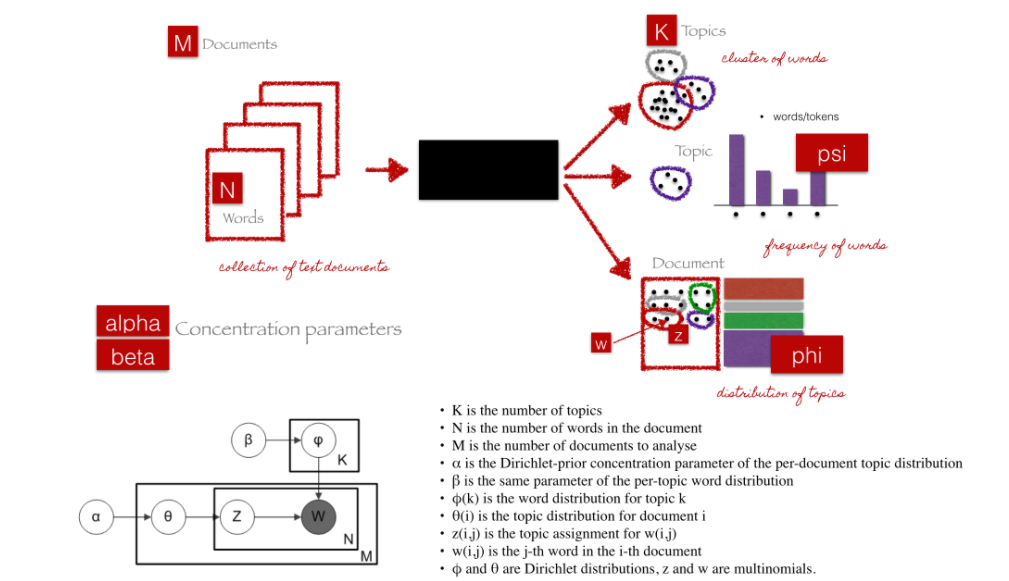


- Nous pouvons décrire le processus génératif de LDA comme, étant donné le nombre M de documents, le nombre N de mots et le nombre K préalable de sujets, le modèle s'entraîne à produire:
  - psi, la distribution des mots pour chaque sujet K
  - phi, la répartition des sujets pour chaque document i
  
  
### Parametres de LDA: 
    - Le paramètre alpha est le paramètre de concentration préalable de Dirichlet qui représente la densité des sujets de document - avec un alpha plus élevé, les documents sont supposés être composés de plus de sujets et se traduisent par une distribution plus spécifique des sujets par document.
    - Le paramètre bêta est le même paramètre de concentration antérieur qui représente la densité de mots sujet-avec une bêta élevée, les sujets sont supposés être composés de la plupart des mots et se traduisent par une distribution de mots plus spécifique par sujet.
   

- Notre choix sera Latent Dirichilet Allocation. Cette methode prendra notre matrice comme entrée et produira une matrice de sujets n × N en sortie, où N est le nombre de catégories de sujets (que nous fournissons comme paramètre). Pour le moment, nous prendrons cela pour 8.


## What is Topic Coherence ? 




In [79]:
from gensim.models.ldamodel import LdaModel
import gensim.corpora as corpora

In [80]:
def lemmatization_keywords(text):
    document = nlp(str(text))
    words = [token.text for token in document if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]
    return ' '.join(words)

In [ ]:
#data_untag= data_tag[['Body', 'Title']].copy()
#for i in ['Body', 'Title']:
#    data_untag[i]= data_untag[i].apply(lemmatization_keywords)

In [81]:
data_tag.head()

,Body,Title,Tags,Text,id,Tags_len,Body_clean,Title_clean,Text_clean,Body_tokens
0,I found an example in the VS2008 Examples for ...,Dynamic LINQ OrderBy on IEnumerable<T> / IQuer...,[c#],dynamic linq orderby on ienumerable / iqueryab...,0,3,found exampl exampl dynam linq allow use sql l...,dynam linq orderbi ienumer iquery,dynam linq orderbi on ienumer iqueryablei foun...,"[found, exampl, exampl, dynam, linq, allow, us..."
1,RequireJS seems to do something internally tha...,Prevent RequireJS from Caching Required Scripts,"[javascript, jquery]",prevent requirejs from caching required script...,1,3,requirej seem someth intern cach requir javasc...,prevent requirej cach requir script,prevent requirej from cach requir scriptsrequi...,"[requirej, seem, someth, intern, cach, requir,..."
3,What is the best way to get IDENTITY of insert...,Best way to get identity of inserted row?,[sql],best way to get identity of inserted row?_what...,3,3,best way get ident insert row know ident ident...,best way get ident insert row,best way to get ident of insert rowwhat is the...,"[best, way, get, ident, insert, row, know, ide..."
4,I am trying to synchronise a project that I ha...,How do you synchronise projects to GitHub with...,[android],how do you synchronise projects to github with...,4,4,tri synchronis project android studio folder g...,synchronis project github android studio,how do you synchronis project to github with a...,"[tri, synchronis, project, android, studio, fo..."
5,"Given a string of JSON data, how can I safely ...",Safely turning a JSON string into an object,[javascript],safely turning a json string into an object_gi...,5,3,given string json data safe turn string javasc...,safe turn json string object,safe turn a json string into an objectgiven a ...,"[given, string, json, data, safe, turn, string..."


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> 11. Create the Dictionary and Corpus needed for Topic Modeling</h2>
</div>


    - Les deux principales entrées du modèle LDA topic sont le dictionnaire (id2word) et le corpus. Créons-les!!!!

In [82]:
corpus_2= []
for i, row in data_tag.iterrows():
    obs= str(row["Text_clean"])
    corpus_2.append(obs)

In [83]:
data_lemmatized = [text.split() for text in corpus_2]

# Create Dictionary
id2word= corpora.Dictionary(data_lemmatized)

# create Copus
texts= data_lemmatized

# Term Document Frequency
corpus_= [id2word.doc2bow(text) for text in texts]

# view
print(corpus_[:1][0][:])

2021-05-16 00:27:11,666 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-16 00:27:13,630 : INFO : built Dictionary(50479 unique tokens: ['a', 'age', 'allow', 'an', 'ani']...) from 8763 documents (total 946031 corpus positions)
2021-05-16 00:27:13,644 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(50479 unique tokens: ['a', 'age', 'allow', 'an', 'ani']...) from 8763 documents (total 946031 corpus positions)", 'datetime': '2021-05-16T00:27:13.634698', 'gensim': '4.0.1', 'python': '3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 2) above implies, word id 0 occurs twice in the first document. Likewise, word id 1 occurs once and so on.

This is used as the input by the LDA model.

In [84]:
# if we want to see what word a given id corresponds to, pass the id as a key to the dictionary
id2word[0]

'a'

In [85]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus_[:1]]

[[('a', 1),
  ('age', 1),
  ('allow', 1),
  ('an', 1),
  ('ani', 1),
  ('desc', 1),
  ('dynam', 2),
  ('eg', 1),
  ('exampl', 2),
  ('for', 2),
  ('found', 1),
  ('function', 1),
  ('get', 1),
  ('ienumer', 1),
  ('ienumerablet', 1),
  ('in', 1),
  ('includ', 1),
  ('iqueryablei', 1),
  ('iqueryablet', 1),
  ('is', 1),
  ('linq', 2),
  ('method', 1),
  ('name', 1),
  ('on', 3),
  ('onli', 1),
  ('orderbi', 1),
  ('orderby', 1),
  ('ordering', 1),
  ('sqllike', 1),
  ('string', 1),
  ('that', 1),
  ('the', 2),
  ('there', 1),
  ('this', 1),
  ('to', 2),
  ('unfortunately', 1),
  ('use', 1),
  ('vs2008', 1),
  ('way', 1),
  ('work', 1),
  ('you', 1)]]


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> 12. Building the Topic Model</h2>
</div>

- Nous avons tout ce qu'il faut pour former le modèle LDA de base. En plus du corpus et du dictionnaire, vous devez également fournir le nombre de Topics. En dehors de cela, alpha et eta sont des hyperparamètres qui affectent la sparsity des topics. Selon la documentation Gensim, les deux valeurs par défaut sont 1.0 / num_topics avant (nous utiliserons la valeur par défaut pour le modèle de base).

- `chunksize` contrôle le nombre de documents traités à la fois dans l'algorithme d'apprentissage. L'augmentation de la taille des morceaux accélérera la formation, au moins tant que le morceau de documents rentrera facilement dans la mémoire.

- `passes` contrôle la fréquence à laquelle nous entraînons le modèle sur l'ensemble du corpus (défini sur 10). Un autre mot pour les passes pourrait être «epochs». les itérations sont quelque peu techniques, mais elles contrôlent essentiellement la fréquence à laquelle nous répétons une boucle particulière sur chaque document. Il est important de définir le nombre de «passes» et d '«itérations» suffisamment élevé.

In [86]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus_,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

2021-05-16 00:27:14,696 : INFO : using symmetric alpha at 0.1
2021-05-16 00:27:14,699 : INFO : using symmetric eta at 0.1
2021-05-16 00:27:14,741 : INFO : using serial LDA version on this node
2021-05-16 00:27:14,863 : INFO : running online LDA training, 10 topics, 10 passes over the supplied corpus of 8763 documents, updating every 300 documents, evaluating every ~3000 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-16 00:27:14,886 : INFO : training LDA model using 3 processes
2021-05-16 00:27:19,402 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/8763, outstanding queue size 1
2021-05-16 00:27:19,416 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/8763, outstanding queue size 2
2021-05-16 00:27:19,426 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #300/8763, outstanding queue size 3
2021-05-16 00:27:19,437 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #400/8763, outstanding queu

2021-05-16 00:27:22,085 : INFO : topic #7 (0.100): 0.022*"a" + 0.021*"the" + 0.019*"to" + 0.019*"i" + 0.018*"it" + 0.017*"in" + 0.014*"and" + 0.013*"is" + 0.012*"this" + 0.008*"use"
2021-05-16 00:27:22,093 : INFO : topic #8 (0.100): 0.042*"the" + 0.035*"a" + 0.035*"to" + 0.034*"i" + 0.016*"in" + 0.015*"is" + 0.013*"of" + 0.012*"and" + 0.011*"for" + 0.011*"how"
2021-05-16 00:27:22,095 : INFO : topic diff=0.140707, rho=0.277350
2021-05-16 00:27:22,103 : INFO : PROGRESS: pass 0, dispatched chunk #23 = documents up to #2400/8763, outstanding queue size 9
2021-05-16 00:27:22,208 : INFO : PROGRESS: pass 0, dispatched chunk #24 = documents up to #2500/8763, outstanding queue size 9
2021-05-16 00:27:22,231 : INFO : PROGRESS: pass 0, dispatched chunk #25 = documents up to #2600/8763, outstanding queue size 9
2021-05-16 00:27:22,414 : INFO : PROGRESS: pass 0, dispatched chunk #26 = documents up to #2700/8763, outstanding queue size 10
2021-05-16 00:27:22,517 : INFO : merging changes from 300 doc

2021-05-16 00:27:24,934 : INFO : topic #0 (0.100): 0.040*"div" + 0.026*"the" + 0.020*"class" + 0.015*"to" + 0.014*"i" + 0.012*"px" + 0.011*"height" + 0.011*"center" + 0.011*"is" + 0.010*"in"
2021-05-16 00:27:24,937 : INFO : topic #1 (0.100): 0.048*"the" + 0.034*"i" + 0.030*"to" + 0.025*"and" + 0.024*"a" + 0.023*"in" + 0.022*"is" + 0.018*"of" + 0.015*"it" + 0.012*"that"
2021-05-16 00:27:24,940 : INFO : topic #3 (0.100): 0.051*"the" + 0.041*"to" + 0.029*"a" + 0.027*"i" + 0.017*"of" + 0.016*"and" + 0.015*"is" + 0.015*"for" + 0.014*"that" + 0.013*"use"
2021-05-16 00:27:24,943 : INFO : topic #5 (0.100): 0.019*"the" + 0.017*"to" + 0.014*"a" + 0.013*"fragment" + 0.013*"null" + 0.011*"b" + 0.011*"i" + 0.009*"override" + 0.008*"in" + 0.007*"for"
2021-05-16 00:27:24,949 : INFO : topic diff=0.083436, rho=0.179605
2021-05-16 00:27:24,953 : INFO : PROGRESS: pass 0, dispatched chunk #39 = documents up to #4000/8763, outstanding queue size 4
2021-05-16 00:27:24,972 : INFO : PROGRESS: pass 0, dispatch

2021-05-16 00:27:26,493 : INFO : topic #1 (0.100): 0.047*"the" + 0.034*"i" + 0.030*"to" + 0.025*"a" + 0.025*"and" + 0.023*"is" + 0.023*"in" + 0.018*"of" + 0.016*"it" + 0.012*"this"
2021-05-16 00:27:26,493 : INFO : topic #9 (0.100): 0.035*"to" + 0.033*"the" + 0.030*"a" + 0.028*"i" + 0.019*"android" + 0.017*"in" + 0.015*"is" + 0.013*"and" + 0.013*"it" + 0.011*"this"
2021-05-16 00:27:26,501 : INFO : topic #4 (0.100): 0.127*"124" + 0.041*"npm" + 0.011*"the" + 0.010*"group" + 0.007*"err" + 0.007*"at" + 0.007*"a" + 0.006*"i" + 0.006*"modulejs" + 0.005*"to"
2021-05-16 00:27:26,501 : INFO : topic diff=0.062807, rho=0.142857
2021-05-16 00:27:26,509 : INFO : PROGRESS: pass 0, dispatched chunk #59 = documents up to #6000/8763, outstanding queue size 9
2021-05-16 00:27:26,517 : INFO : PROGRESS: pass 0, dispatched chunk #60 = documents up to #6100/8763, outstanding queue size 8
2021-05-16 00:27:26,517 : INFO : PROGRESS: pass 0, dispatched chunk #61 = documents up to #6200/8763, outstanding queue si

2021-05-16 00:27:28,093 : INFO : PROGRESS: pass 0, dispatched chunk #75 = documents up to #7600/8763, outstanding queue size 9
2021-05-16 00:27:28,101 : INFO : PROGRESS: pass 0, dispatched chunk #76 = documents up to #7700/8763, outstanding queue size 9
2021-05-16 00:27:28,224 : INFO : PROGRESS: pass 0, dispatched chunk #77 = documents up to #7800/8763, outstanding queue size 9
2021-05-16 00:27:28,299 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:28,364 : INFO : topic #3 (0.100): 0.055*"the" + 0.041*"to" + 0.030*"i" + 0.030*"a" + 0.018*"of" + 0.017*"and" + 0.015*"is" + 0.014*"it" + 0.013*"that" + 0.013*"in"
2021-05-16 00:27:28,364 : INFO : topic #5 (0.100): 0.023*"public" + 0.021*"void" + 0.020*"null" + 0.019*"fragment" + 0.018*"override" + 0.015*"new" + 0.014*"int" + 0.014*"the" + 0.011*"position" + 0.010*"return"
2021-05-16 00:27:28,372 : INFO : topic #8 (0.100): 0.040*"the" + 0.038*"i" + 0.036*"to" + 0.033*"a" + 0.020*"in" + 0.013*"is" +

2021-05-16 00:27:30,000 : INFO : topic #7 (0.100): 0.031*"int" + 0.028*"public" + 0.024*"static" + 0.021*"std" + 0.014*"void" + 0.014*"string" + 0.011*"cout" + 0.011*"main" + 0.010*"pip" + 0.009*"class"
2021-05-16 00:27:30,006 : INFO : topic diff=0.051843, rho=0.109764
2021-05-16 00:27:30,399 : INFO : -7.830 per-word bound, 227.6 perplexity estimate based on a held-out corpus of 63 documents with 8006 words
2021-05-16 00:27:30,462 : INFO : merging changes from 100 documents into a model of 8763 documents
2021-05-16 00:27:30,536 : INFO : topic #9 (0.100): 0.034*"the" + 0.033*"android" + 0.032*"to" + 0.026*"i" + 0.021*"a" + 0.020*"at" + 0.015*"in" + 0.014*"is" + 0.012*"it" + 0.012*"and"
2021-05-16 00:27:30,541 : INFO : topic #3 (0.100): 0.058*"the" + 0.042*"to" + 0.031*"i" + 0.029*"a" + 0.018*"of" + 0.017*"and" + 0.016*"is" + 0.015*"it" + 0.014*"in" + 0.013*"that"
2021-05-16 00:27:30,547 : INFO : topic #4 (0.100): 0.224*"124" + 0.035*"npm" + 0.011*"err" + 0.009*"group" + 0.008*"s1" + 0.0

2021-05-16 00:27:32,351 : INFO : topic #8 (0.100): 0.038*"the" + 0.037*"i" + 0.036*"to" + 0.031*"a" + 0.021*"in" + 0.013*"is" + 0.012*"how" + 0.011*"this" + 0.011*"and" + 0.010*"file"
2021-05-16 00:27:32,351 : INFO : topic #1 (0.100): 0.046*"the" + 0.031*"i" + 0.029*"to" + 0.028*"a" + 0.024*"and" + 0.023*"is" + 0.022*"in" + 0.020*"of" + 0.015*"it" + 0.012*"use"
2021-05-16 00:27:32,359 : INFO : topic diff=0.034406, rho=0.105627
2021-05-16 00:27:32,359 : INFO : PROGRESS: pass 1, dispatched chunk #20 = documents up to #2100/8763, outstanding queue size 9
2021-05-16 00:27:32,455 : INFO : PROGRESS: pass 1, dispatched chunk #21 = documents up to #2200/8763, outstanding queue size 9
2021-05-16 00:27:32,511 : INFO : PROGRESS: pass 1, dispatched chunk #22 = documents up to #2300/8763, outstanding queue size 9
2021-05-16 00:27:32,559 : INFO : PROGRESS: pass 1, dispatched chunk #23 = documents up to #2400/8763, outstanding queue size 10
2021-05-16 00:27:32,614 : INFO : merging changes from 300 do

2021-05-16 00:27:34,051 : INFO : PROGRESS: pass 1, dispatched chunk #37 = documents up to #3800/8763, outstanding queue size 9
2021-05-16 00:27:34,260 : INFO : merging changes from 400 documents into a model of 8763 documents
2021-05-16 00:27:34,336 : INFO : topic #9 (0.100): 0.034*"the" + 0.031*"android" + 0.030*"to" + 0.025*"i" + 0.019*"at" + 0.018*"a" + 0.014*"in" + 0.013*"is" + 0.011*"and" + 0.011*"it"
2021-05-16 00:27:34,344 : INFO : topic #5 (0.100): 0.037*"public" + 0.028*"null" + 0.025*"void" + 0.019*"new" + 0.018*"fragment" + 0.017*"int" + 0.016*"override" + 0.014*"privat" + 0.014*"publ" + 0.011*"return"
2021-05-16 00:27:34,344 : INFO : topic #1 (0.100): 0.045*"the" + 0.031*"i" + 0.029*"to" + 0.029*"a" + 0.023*"is" + 0.023*"and" + 0.022*"in" + 0.020*"of" + 0.015*"it" + 0.013*"that"
2021-05-16 00:27:34,344 : INFO : topic #4 (0.100): 0.167*"124" + 0.056*"npm" + 0.033*"err" + 0.014*"group" + 0.008*"gyp" + 0.007*"modulejs" + 0.006*"s2" + 0.005*"s1" + 0.005*"packagejson" + 0.004*"s

2021-05-16 00:27:36,035 : INFO : topic #5 (0.100): 0.041*"public" + 0.030*"void" + 0.029*"null" + 0.019*"new" + 0.018*"fragment" + 0.017*"int" + 0.016*"override" + 0.015*"publ" + 0.015*"privat" + 0.012*"class"
2021-05-16 00:27:36,039 : INFO : topic #2 (0.100): 0.050*"i" + 0.043*"to" + 0.037*"the" + 0.029*"a" + 0.024*"git" + 0.019*"and" + 0.015*"file" + 0.014*"in" + 0.012*"how" + 0.012*"it"
2021-05-16 00:27:36,039 : INFO : topic #8 (0.100): 0.039*"i" + 0.038*"the" + 0.036*"to" + 0.033*"a" + 0.021*"in" + 0.014*"is" + 0.013*"how" + 0.011*"this" + 0.011*"file" + 0.010*"and"
2021-05-16 00:27:36,047 : INFO : topic diff=0.037304, rho=0.105627
2021-05-16 00:27:36,052 : INFO : PROGRESS: pass 1, dispatched chunk #54 = documents up to #5500/8763, outstanding queue size 9
2021-05-16 00:27:36,059 : INFO : PROGRESS: pass 1, dispatched chunk #55 = documents up to #5600/8763, outstanding queue size 9
2021-05-16 00:27:36,156 : INFO : PROGRESS: pass 1, dispatched chunk #56 = documents up to #5700/8763, 

2021-05-16 00:27:37,727 : INFO : PROGRESS: pass 1, dispatched chunk #70 = documents up to #7100/8763, outstanding queue size 9
2021-05-16 00:27:37,768 : INFO : PROGRESS: pass 1, dispatched chunk #71 = documents up to #7200/8763, outstanding queue size 9
2021-05-16 00:27:37,915 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:37,997 : INFO : topic #9 (0.100): 0.033*"android" + 0.033*"the" + 0.028*"to" + 0.024*"i" + 0.021*"at" + 0.015*"a" + 0.013*"is" + 0.013*"in" + 0.011*"error" + 0.011*"and"
2021-05-16 00:27:37,997 : INFO : topic #6 (0.100): 0.037*"x" + 0.029*"b" + 0.023*"key" + 0.021*"column" + 0.017*"y" + 0.015*"id" + 0.014*"a" + 0.012*"i" + 0.010*"the" + 0.010*"c"
2021-05-16 00:27:37,997 : INFO : topic #2 (0.100): 0.049*"i" + 0.044*"to" + 0.037*"the" + 0.029*"a" + 0.025*"git" + 0.019*"and" + 0.014*"in" + 0.014*"file" + 0.012*"how" + 0.012*"my"
2021-05-16 00:27:38,005 : INFO : topic #3 (0.100): 0.059*"the" + 0.043*"to" + 0.034*"i" + 0.030*"a

2021-05-16 00:27:39,379 : INFO : topic #1 (0.100): 0.044*"the" + 0.030*"i" + 0.030*"a" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"in" + 0.021*"of" + 0.015*"it" + 0.012*"for"
2021-05-16 00:27:39,379 : INFO : topic #0 (0.100): 0.088*"div" + 0.035*"class" + 0.034*"px" + 0.028*"height" + 0.027*"width" + 0.016*"id" + 0.013*"center" + 0.011*"style" + 0.010*"css" + 0.009*"left"
2021-05-16 00:27:39,387 : INFO : topic diff=0.025689, rho=0.105627
2021-05-16 00:27:39,387 : INFO : PROGRESS: pass 1, dispatched chunk #86 = documents up to #8700/8763, outstanding queue size 8
2021-05-16 00:27:39,395 : INFO : PROGRESS: pass 1, dispatched chunk #87 = documents up to #8763/8763, outstanding queue size 8
2021-05-16 00:27:39,573 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:39,647 : INFO : topic #3 (0.100): 0.060*"the" + 0.044*"to" + 0.034*"i" + 0.030*"a" + 0.018*"and" + 0.017*"of" + 0.016*"is" + 0.015*"it" + 0.015*"in" + 0.013*"that"
2021-05-16 00:27:39

2021-05-16 00:27:41,615 : INFO : topic #9 (0.100): 0.045*"android" + 0.033*"the" + 0.026*"to" + 0.022*"i" + 0.018*"at" + 0.012*"is" + 0.012*"a" + 0.012*"in" + 0.010*"it" + 0.010*"error"
2021-05-16 00:27:41,618 : INFO : topic #5 (0.100): 0.048*"public" + 0.035*"void" + 0.029*"null" + 0.025*"new" + 0.023*"privat" + 0.019*"int" + 0.017*"return" + 0.016*"publ" + 0.015*"override" + 0.015*"class"
2021-05-16 00:27:41,620 : INFO : topic diff=0.035395, rho=0.105042
2021-05-16 00:27:41,620 : INFO : PROGRESS: pass 2, dispatched chunk #17 = documents up to #1800/8763, outstanding queue size 9
2021-05-16 00:27:41,658 : INFO : PROGRESS: pass 2, dispatched chunk #18 = documents up to #1900/8763, outstanding queue size 9
2021-05-16 00:27:41,684 : INFO : PROGRESS: pass 2, dispatched chunk #19 = documents up to #2000/8763, outstanding queue size 9
2021-05-16 00:27:41,797 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:41,871 : INFO : topic #8 (0.100): 0.038*"i

2021-05-16 00:27:43,453 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:43,534 : INFO : topic #0 (0.100): 0.091*"div" + 0.039*"class" + 0.033*"px" + 0.029*"height" + 0.026*"width" + 0.022*"id" + 0.013*"center" + 0.012*"css" + 0.012*"style" + 0.010*"left"
2021-05-16 00:27:43,534 : INFO : topic #7 (0.100): 0.055*"int" + 0.038*"std" + 0.025*"static" + 0.021*"ms" + 0.015*"main" + 0.014*"cout" + 0.011*"char" + 0.011*"n" + 0.011*"void" + 0.011*"pip"
2021-05-16 00:27:43,542 : INFO : topic #5 (0.100): 0.057*"public" + 0.033*"null" + 0.031*"void" + 0.025*"new" + 0.023*"privat" + 0.021*"int" + 0.019*"publ" + 0.018*"class" + 0.014*"fragment" + 0.014*"return"
2021-05-16 00:27:43,542 : INFO : topic #4 (0.100): 0.180*"124" + 0.043*"npm" + 0.027*"err" + 0.017*"group" + 0.007*"gyp" + 0.007*"s2" + 0.006*"modulejs" + 0.006*"s1" + 0.004*"select" + 0.004*"verbos"
2021-05-16 00:27:43,551 : INFO : topic #9 (0.100): 0.042*"android" + 0.033*"the" + 0.025*"to" + 0.02

2021-05-16 00:27:45,103 : INFO : topic #1 (0.100): 0.043*"the" + 0.031*"i" + 0.030*"a" + 0.029*"to" + 0.023*"is" + 0.023*"and" + 0.022*"in" + 0.021*"of" + 0.015*"it" + 0.013*"for"
2021-05-16 00:27:45,111 : INFO : topic #2 (0.100): 0.050*"i" + 0.043*"to" + 0.037*"the" + 0.028*"a" + 0.025*"git" + 0.019*"and" + 0.016*"file" + 0.013*"in" + 0.012*"how" + 0.012*"my"
2021-05-16 00:27:45,119 : INFO : topic diff=0.024324, rho=0.105042
2021-05-16 00:27:45,119 : INFO : PROGRESS: pass 2, dispatched chunk #51 = documents up to #5200/8763, outstanding queue size 9
2021-05-16 00:27:45,127 : INFO : PROGRESS: pass 2, dispatched chunk #52 = documents up to #5300/8763, outstanding queue size 9
2021-05-16 00:27:45,225 : INFO : PROGRESS: pass 2, dispatched chunk #53 = documents up to #5400/8763, outstanding queue size 9
2021-05-16 00:27:45,333 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:45,415 : INFO : topic #9 (0.100): 0.043*"android" + 0.032*"the" + 0.024*"

2021-05-16 00:27:46,657 : INFO : PROGRESS: pass 2, dispatched chunk #68 = documents up to #6900/8763, outstanding queue size 9
2021-05-16 00:27:46,745 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:46,819 : INFO : topic #1 (0.100): 0.043*"the" + 0.031*"i" + 0.031*"a" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"in" + 0.021*"of" + 0.015*"it" + 0.013*"that"
2021-05-16 00:27:46,819 : INFO : topic #6 (0.100): 0.045*"x" + 0.039*"b" + 0.026*"column" + 0.026*"key" + 0.019*"y" + 0.016*"c" + 0.015*"row" + 0.013*"a" + 0.011*"index" + 0.010*"panda"
2021-05-16 00:27:46,827 : INFO : topic #8 (0.100): 0.039*"i" + 0.037*"to" + 0.035*"the" + 0.032*"a" + 0.022*"in" + 0.014*"how" + 0.013*"is" + 0.012*"this" + 0.011*"file" + 0.011*"do"
2021-05-16 00:27:46,827 : INFO : topic #2 (0.100): 0.050*"i" + 0.043*"to" + 0.037*"the" + 0.028*"a" + 0.025*"git" + 0.019*"and" + 0.015*"file" + 0.013*"in" + 0.012*"my" + 0.012*"how"
2021-05-16 00:27:46,827 : INFO : topic #4

2021-05-16 00:27:48,230 : INFO : topic #0 (0.100): 0.089*"div" + 0.037*"class" + 0.032*"px" + 0.027*"height" + 0.027*"width" + 0.016*"id" + 0.013*"center" + 0.013*"css" + 0.011*"style" + 0.009*"bootstrap"
2021-05-16 00:27:48,230 : INFO : topic #7 (0.100): 0.063*"int" + 0.032*"std" + 0.022*"ms" + 0.020*"char" + 0.019*"n" + 0.018*"cout" + 0.017*"main" + 0.017*"includ" + 0.016*"static" + 0.011*"pip"
2021-05-16 00:27:48,240 : INFO : topic diff=0.021967, rho=0.105042
2021-05-16 00:27:48,242 : INFO : PROGRESS: pass 2, dispatched chunk #83 = documents up to #8400/8763, outstanding queue size 8
2021-05-16 00:27:48,251 : INFO : PROGRESS: pass 2, dispatched chunk #84 = documents up to #8500/8763, outstanding queue size 8
2021-05-16 00:27:48,253 : INFO : PROGRESS: pass 2, dispatched chunk #85 = documents up to #8600/8763, outstanding queue size 9
2021-05-16 00:27:48,443 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:48,553 : INFO : topic #6 (0.100): 0.

2021-05-16 00:27:51,135 : INFO : topic diff=0.027764, rho=0.104467
2021-05-16 00:27:51,143 : INFO : PROGRESS: pass 3, dispatched chunk #11 = documents up to #1200/8763, outstanding queue size 9
2021-05-16 00:27:51,238 : INFO : PROGRESS: pass 3, dispatched chunk #12 = documents up to #1300/8763, outstanding queue size 9
2021-05-16 00:27:51,270 : INFO : PROGRESS: pass 3, dispatched chunk #13 = documents up to #1400/8763, outstanding queue size 9
2021-05-16 00:27:51,385 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:51,464 : INFO : topic #1 (0.100): 0.043*"the" + 0.030*"a" + 0.030*"i" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.013*"for"
2021-05-16 00:27:51,464 : INFO : topic #4 (0.100): 0.203*"124" + 0.052*"npm" + 0.038*"err" + 0.017*"modulejs" + 0.011*"group" + 0.009*"eacces" + 0.006*"usrlocallibnodemodules" + 0.006*"packagejson" + 0.005*"album" + 0.005*"track"
2021-05-16 00:27:51,464 : INFO : topic #9 (

2021-05-16 00:27:53,135 : INFO : topic #4 (0.100): 0.178*"124" + 0.061*"npm" + 0.042*"err" + 0.013*"group" + 0.010*"modulejs" + 0.005*"eacces" + 0.005*"verbos" + 0.005*"packagejson" + 0.004*"socketio" + 0.004*"select"
2021-05-16 00:27:53,143 : INFO : topic #8 (0.100): 0.038*"i" + 0.035*"to" + 0.033*"the" + 0.029*"a" + 0.024*"in" + 0.013*"is" + 0.013*"how" + 0.012*"file" + 0.012*"this" + 0.011*"do"
2021-05-16 00:27:53,143 : INFO : topic #3 (0.100): 0.061*"the" + 0.046*"to" + 0.037*"i" + 0.030*"a" + 0.019*"and" + 0.016*"of" + 0.015*"it" + 0.015*"is" + 0.015*"in" + 0.012*"that"
2021-05-16 00:27:53,143 : INFO : topic #2 (0.100): 0.048*"i" + 0.043*"to" + 0.038*"the" + 0.029*"a" + 0.026*"git" + 0.018*"and" + 0.017*"file" + 0.014*"in" + 0.013*"it" + 0.012*"my"
2021-05-16 00:27:53,151 : INFO : topic diff=0.022632, rho=0.104467
2021-05-16 00:27:53,159 : INFO : PROGRESS: pass 3, dispatched chunk #29 = documents up to #3000/8763, outstanding queue size 9
2021-05-16 00:27:53,167 : INFO : PROGRESS:

2021-05-16 00:27:54,857 : INFO : topic diff=0.030956, rho=0.104467
2021-05-16 00:27:54,857 : INFO : PROGRESS: pass 3, dispatched chunk #44 = documents up to #4500/8763, outstanding queue size 9
2021-05-16 00:27:54,873 : INFO : PROGRESS: pass 3, dispatched chunk #45 = documents up to #4600/8763, outstanding queue size 8
2021-05-16 00:27:54,874 : INFO : PROGRESS: pass 3, dispatched chunk #46 = documents up to #4700/8763, outstanding queue size 9
2021-05-16 00:27:55,042 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:55,130 : INFO : topic #2 (0.100): 0.049*"i" + 0.043*"to" + 0.038*"the" + 0.027*"a" + 0.024*"git" + 0.018*"and" + 0.016*"file" + 0.013*"in" + 0.012*"my" + 0.012*"it"
2021-05-16 00:27:55,130 : INFO : topic #5 (0.100): 0.057*"public" + 0.039*"void" + 0.028*"new" + 0.026*"null" + 0.026*"publ" + 0.024*"privat" + 0.023*"int" + 0.023*"class" + 0.017*"return" + 0.016*"fragment"
2021-05-16 00:27:55,138 : INFO : topic #9 (0.100): 0.054*"andro

2021-05-16 00:27:56,480 : INFO : topic #9 (0.100): 0.051*"android" + 0.029*"the" + 0.027*"at" + 0.019*"to" + 0.018*"i" + 0.012*"error" + 0.009*"app" + 0.009*"is" + 0.009*"except" + 0.008*"my"
2021-05-16 00:27:56,488 : INFO : topic #2 (0.100): 0.050*"i" + 0.043*"to" + 0.037*"the" + 0.027*"a" + 0.026*"git" + 0.018*"and" + 0.017*"file" + 0.013*"in" + 0.012*"my" + 0.012*"how"
2021-05-16 00:27:56,502 : INFO : topic #6 (0.100): 0.051*"x" + 0.047*"b" + 0.026*"column" + 0.025*"key" + 0.021*"c" + 0.019*"y" + 0.014*"a" + 0.014*"row" + 0.011*"d" + 0.011*"index"
2021-05-16 00:27:56,509 : INFO : topic #4 (0.100): 0.185*"124" + 0.050*"npm" + 0.031*"err" + 0.012*"group" + 0.010*"modulejs" + 0.006*"socketio" + 0.005*"track" + 0.005*"packagejson" + 0.004*"gyp" + 0.004*"node"
2021-05-16 00:27:56,510 : INFO : topic diff=0.024051, rho=0.104467
2021-05-16 00:27:56,517 : INFO : PROGRESS: pass 3, dispatched chunk #63 = documents up to #6400/8763, outstanding queue size 10
2021-05-16 00:27:56,525 : INFO : PRO

2021-05-16 00:27:57,914 : INFO : topic diff=0.024870, rho=0.104467
2021-05-16 00:27:57,914 : INFO : PROGRESS: pass 3, dispatched chunk #78 = documents up to #7900/8763, outstanding queue size 9
2021-05-16 00:27:57,922 : INFO : PROGRESS: pass 3, dispatched chunk #79 = documents up to #8000/8763, outstanding queue size 9
2021-05-16 00:27:57,992 : INFO : PROGRESS: pass 3, dispatched chunk #80 = documents up to #8100/8763, outstanding queue size 9
2021-05-16 00:27:58,063 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:27:58,143 : INFO : topic #0 (0.100): 0.086*"div" + 0.038*"class" + 0.030*"px" + 0.028*"height" + 0.026*"width" + 0.020*"id" + 0.015*"css" + 0.012*"style" + 0.012*"center" + 0.009*"href"
2021-05-16 00:27:58,143 : INFO : topic #9 (0.100): 0.059*"android" + 0.028*"the" + 0.026*"at" + 0.017*"to" + 0.017*"i" + 0.013*"error" + 0.009*"is" + 0.008*"except" + 0.008*"my" + 0.008*"app"
2021-05-16 00:27:58,143 : INFO : topic #6 (0.100): 0.049*"x" 

2021-05-16 00:27:59,739 : INFO : PROGRESS: pass 4, dispatched chunk #8 = documents up to #900/8763, outstanding queue size 9
2021-05-16 00:27:59,972 : INFO : PROGRESS: pass 4, dispatched chunk #9 = documents up to #1000/8763, outstanding queue size 9
2021-05-16 00:27:59,996 : INFO : PROGRESS: pass 4, dispatched chunk #10 = documents up to #1100/8763, outstanding queue size 9
2021-05-16 00:28:00,087 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:00,158 : INFO : topic #9 (0.100): 0.065*"android" + 0.028*"the" + 0.027*"at" + 0.017*"to" + 0.016*"i" + 0.011*"error" + 0.009*"is" + 0.008*"my" + 0.008*"app" + 0.008*"except"
2021-05-16 00:28:00,158 : INFO : topic #2 (0.100): 0.049*"i" + 0.043*"to" + 0.037*"the" + 0.028*"git" + 0.027*"a" + 0.019*"and" + 0.018*"file" + 0.013*"in" + 0.012*"it" + 0.012*"my"
2021-05-16 00:28:00,165 : INFO : topic #3 (0.100): 0.062*"the" + 0.046*"to" + 0.037*"i" + 0.030*"a" + 0.019*"and" + 0.016*"is" + 0.016*"of" + 0.016*"

2021-05-16 00:28:01,494 : INFO : topic #1 (0.100): 0.044*"the" + 0.030*"a" + 0.030*"i" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.022*"in" + 0.014*"it" + 0.013*"for"
2021-05-16 00:28:01,497 : INFO : topic #8 (0.100): 0.038*"i" + 0.036*"to" + 0.031*"the" + 0.030*"a" + 0.025*"in" + 0.013*"how" + 0.013*"file" + 0.013*"is" + 0.012*"this" + 0.011*"do"
2021-05-16 00:28:01,500 : INFO : topic #6 (0.100): 0.043*"x" + 0.040*"b" + 0.026*"key" + 0.024*"column" + 0.019*"c" + 0.018*"row" + 0.015*"y" + 0.013*"j" + 0.011*"index" + 0.011*"a"
2021-05-16 00:28:01,505 : INFO : topic diff=0.021479, rho=0.103902
2021-05-16 00:28:01,505 : INFO : PROGRESS: pass 4, dispatched chunk #25 = documents up to #2600/8763, outstanding queue size 8
2021-05-16 00:28:01,505 : INFO : PROGRESS: pass 4, dispatched chunk #26 = documents up to #2700/8763, outstanding queue size 9
2021-05-16 00:28:01,554 : INFO : PROGRESS: pass 4, dispatched chunk #27 = documents up to #2800/8763, outstanding queue size 9
2021-05

2021-05-16 00:28:03,027 : INFO : topic diff=0.025401, rho=0.103902
2021-05-16 00:28:03,030 : INFO : PROGRESS: pass 4, dispatched chunk #41 = documents up to #4200/8763, outstanding queue size 9
2021-05-16 00:28:03,039 : INFO : PROGRESS: pass 4, dispatched chunk #42 = documents up to #4300/8763, outstanding queue size 8
2021-05-16 00:28:03,039 : INFO : PROGRESS: pass 4, dispatched chunk #43 = documents up to #4400/8763, outstanding queue size 9
2021-05-16 00:28:03,162 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:03,235 : INFO : topic #2 (0.100): 0.049*"i" + 0.043*"to" + 0.038*"the" + 0.027*"a" + 0.025*"git" + 0.018*"file" + 0.018*"and" + 0.013*"in" + 0.012*"my" + 0.012*"how"
2021-05-16 00:28:03,241 : INFO : topic #5 (0.100): 0.061*"public" + 0.039*"void" + 0.030*"new" + 0.029*"class" + 0.029*"null" + 0.026*"publ" + 0.023*"int" + 0.023*"privat" + 0.018*"return" + 0.015*"fragment"
2021-05-16 00:28:03,250 : INFO : topic #0 (0.100): 0.079*"div"

2021-05-16 00:28:04,740 : INFO : topic #9 (0.100): 0.058*"android" + 0.028*"at" + 0.025*"the" + 0.015*"to" + 0.014*"i" + 0.013*"error" + 0.009*"app" + 0.009*"except" + 0.008*"is" + 0.008*"my"
2021-05-16 00:28:04,744 : INFO : topic #6 (0.100): 0.052*"b" + 0.052*"x" + 0.027*"column" + 0.026*"key" + 0.024*"c" + 0.019*"y" + 0.016*"row" + 0.014*"a" + 0.012*"d" + 0.011*"index"
2021-05-16 00:28:04,744 : INFO : topic #4 (0.100): 0.158*"124" + 0.050*"npm" + 0.032*"err" + 0.011*"group" + 0.010*"modulejs" + 0.007*"socketio" + 0.006*"track" + 0.005*"gyp" + 0.005*"packagejson" + 0.005*"node"
2021-05-16 00:28:04,744 : INFO : topic #0 (0.100): 0.079*"div" + 0.037*"class" + 0.030*"px" + 0.028*"width" + 0.027*"height" + 0.024*"id" + 0.016*"css" + 0.013*"center" + 0.012*"style" + 0.009*"parent"
2021-05-16 00:28:04,755 : INFO : topic diff=0.023759, rho=0.103902
2021-05-16 00:28:04,757 : INFO : PROGRESS: pass 4, dispatched chunk #59 = documents up to #6000/8763, outstanding queue size 8
2021-05-16 00:28:0

2021-05-16 00:28:06,110 : INFO : topic #1 (0.100): 0.044*"the" + 0.031*"a" + 0.030*"i" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.013*"that"
2021-05-16 00:28:06,110 : INFO : topic #8 (0.100): 0.038*"i" + 0.036*"to" + 0.031*"a" + 0.031*"the" + 0.024*"in" + 0.014*"how" + 0.012*"is" + 0.012*"file" + 0.011*"this" + 0.011*"string"
2021-05-16 00:28:06,118 : INFO : topic diff=0.024738, rho=0.103902
2021-05-16 00:28:06,118 : INFO : PROGRESS: pass 4, dispatched chunk #76 = documents up to #7700/8763, outstanding queue size 9
2021-05-16 00:28:06,159 : INFO : PROGRESS: pass 4, dispatched chunk #77 = documents up to #7800/8763, outstanding queue size 9
2021-05-16 00:28:06,216 : INFO : PROGRESS: pass 4, dispatched chunk #78 = documents up to #7900/8763, outstanding queue size 9
2021-05-16 00:28:06,282 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:06,350 : INFO : topic #0 (0.100): 0.084*"div" + 0.039*"class" + 0.02

2021-05-16 00:28:08,147 : INFO : topic #4 (0.100): 0.209*"124" + 0.045*"npm" + 0.030*"err" + 0.011*"modulejs" + 0.009*"group" + 0.007*"s1" + 0.006*"s2" + 0.005*"eacces" + 0.005*"packagejson" + 0.004*"socketio"
2021-05-16 00:28:08,152 : INFO : topic #6 (0.100): 0.049*"b" + 0.048*"x" + 0.026*"c" + 0.025*"column" + 0.022*"key" + 0.020*"row" + 0.018*"y" + 0.012*"a" + 0.012*"d" + 0.011*"index"
2021-05-16 00:28:08,157 : INFO : topic #8 (0.100): 0.038*"i" + 0.035*"to" + 0.031*"the" + 0.028*"a" + 0.024*"in" + 0.013*"how" + 0.013*"is" + 0.012*"file" + 0.012*"this" + 0.010*"get"
2021-05-16 00:28:08,166 : INFO : topic diff=0.039348, rho=0.103902
2021-05-16 00:28:08,415 : INFO : -7.583 per-word bound, 191.8 perplexity estimate based on a held-out corpus of 63 documents with 8006 words
2021-05-16 00:28:08,417 : INFO : PROGRESS: pass 5, dispatched chunk #0 = documents up to #100/8763, outstanding queue size 1
2021-05-16 00:28:08,425 : INFO : PROGRESS: pass 5, dispatched chunk #1 = documents up to #2

2021-05-16 00:28:09,862 : INFO : topic #3 (0.100): 0.062*"the" + 0.046*"to" + 0.038*"i" + 0.030*"a" + 0.018*"and" + 0.016*"it" + 0.016*"in" + 0.016*"is" + 0.015*"of" + 0.012*"that"
2021-05-16 00:28:09,862 : INFO : topic #0 (0.100): 0.085*"div" + 0.040*"class" + 0.031*"height" + 0.028*"px" + 0.027*"id" + 0.026*"width" + 0.017*"css" + 0.015*"style" + 0.010*"center" + 0.009*"href"
2021-05-16 00:28:09,862 : INFO : topic #5 (0.100): 0.057*"public" + 0.040*"void" + 0.031*"new" + 0.027*"null" + 0.026*"class" + 0.024*"publ" + 0.022*"return" + 0.022*"int" + 0.022*"privat" + 0.013*"override"
2021-05-16 00:28:09,878 : INFO : topic #7 (0.100): 0.071*"int" + 0.036*"std" + 0.027*"ms" + 0.025*"char" + 0.025*"const" + 0.020*"n" + 0.015*"cout" + 0.014*"includ" + 0.011*"main" + 0.010*"pip"
2021-05-16 00:28:09,878 : INFO : topic #4 (0.100): 0.173*"124" + 0.055*"npm" + 0.033*"err" + 0.009*"group" + 0.006*"modulejs" + 0.006*"verbos" + 0.005*"s1" + 0.005*"nodej" + 0.004*"album" + 0.004*"gitignore"
2021-05-1

2021-05-16 00:28:11,195 : INFO : topic #1 (0.100): 0.044*"the" + 0.031*"a" + 0.030*"i" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:11,203 : INFO : topic diff=0.023696, rho=0.103346
2021-05-16 00:28:11,203 : INFO : PROGRESS: pass 5, dispatched chunk #38 = documents up to #3900/8763, outstanding queue size 9
2021-05-16 00:28:11,211 : INFO : PROGRESS: pass 5, dispatched chunk #39 = documents up to #4000/8763, outstanding queue size 8
2021-05-16 00:28:11,219 : INFO : PROGRESS: pass 5, dispatched chunk #40 = documents up to #4100/8763, outstanding queue size 9
2021-05-16 00:28:11,385 : INFO : merging changes from 400 documents into a model of 8763 documents
2021-05-16 00:28:11,458 : INFO : topic #3 (0.100): 0.062*"the" + 0.046*"to" + 0.038*"i" + 0.030*"a" + 0.019*"and" + 0.015*"of" + 0.015*"in" + 0.015*"is" + 0.015*"it" + 0.012*"that"
2021-05-16 00:28:11,466 : INFO : topic #4 (0.100): 0.151*"124" + 0.061*"npm" + 0.044*"err" +

2021-05-16 00:28:12,822 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:12,903 : INFO : topic #5 (0.100): 0.055*"public" + 0.041*"void" + 0.031*"new" + 0.031*"null" + 0.028*"class" + 0.026*"publ" + 0.024*"int" + 0.024*"privat" + 0.019*"return" + 0.016*"fragment"
2021-05-16 00:28:12,903 : INFO : topic #6 (0.100): 0.056*"b" + 0.052*"x" + 0.026*"c" + 0.025*"key" + 0.025*"column" + 0.019*"y" + 0.017*"row" + 0.014*"a" + 0.012*"d" + 0.010*"index"
2021-05-16 00:28:12,911 : INFO : topic #1 (0.100): 0.044*"the" + 0.031*"a" + 0.030*"i" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:12,911 : INFO : topic #0 (0.100): 0.079*"div" + 0.037*"class" + 0.028*"px" + 0.028*"height" + 0.028*"width" + 0.025*"id" + 0.018*"css" + 0.013*"center" + 0.012*"style" + 0.010*"child"
2021-05-16 00:28:12,911 : INFO : topic #8 (0.100): 0.038*"i" + 0.036*"to" + 0.032*"a" + 0.030*"the" + 0.023*"in" + 0.014*"how" + 0

2021-05-16 00:28:14,262 : INFO : topic #9 (0.100): 0.059*"android" + 0.035*"at" + 0.020*"the" + 0.016*"error" + 0.011*"i" + 0.011*"to" + 0.010*"except" + 0.009*"build" + 0.008*"app" + 0.008*"activ"
2021-05-16 00:28:14,271 : INFO : topic diff=0.025874, rho=0.103346
2021-05-16 00:28:14,271 : INFO : PROGRESS: pass 5, dispatched chunk #71 = documents up to #7200/8763, outstanding queue size 8
2021-05-16 00:28:14,279 : INFO : PROGRESS: pass 5, dispatched chunk #72 = documents up to #7300/8763, outstanding queue size 8
2021-05-16 00:28:14,279 : INFO : PROGRESS: pass 5, dispatched chunk #73 = documents up to #7400/8763, outstanding queue size 9
2021-05-16 00:28:14,384 : INFO : PROGRESS: pass 5, dispatched chunk #74 = documents up to #7500/8763, outstanding queue size 9
2021-05-16 00:28:14,484 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:14,559 : INFO : topic #5 (0.100): 0.055*"public" + 0.040*"void" + 0.032*"new" + 0.028*"class" + 0.027*"null" + 

2021-05-16 00:28:16,016 : INFO : topic #0 (0.100): 0.083*"div" + 0.036*"class" + 0.032*"px" + 0.026*"height" + 0.026*"width" + 0.022*"id" + 0.021*"css" + 0.015*"style" + 0.012*"center" + 0.011*"text"
2021-05-16 00:28:16,016 : INFO : topic #9 (0.100): 0.075*"android" + 0.028*"at" + 0.020*"the" + 0.013*"error" + 0.011*"i" + 0.011*"to" + 0.009*"except" + 0.008*"app" + 0.008*"activ" + 0.007*"my"
2021-05-16 00:28:16,022 : INFO : topic #2 (0.100): 0.049*"i" + 0.044*"to" + 0.037*"the" + 0.027*"git" + 0.026*"a" + 0.019*"file" + 0.018*"and" + 0.013*"in" + 0.012*"my" + 0.012*"how"
2021-05-16 00:28:16,022 : INFO : topic #8 (0.100): 0.038*"i" + 0.035*"to" + 0.029*"the" + 0.029*"a" + 0.024*"in" + 0.013*"how" + 0.013*"file" + 0.012*"is" + 0.012*"this" + 0.011*"string"
2021-05-16 00:28:16,031 : INFO : topic diff=0.031854, rho=0.103346
2021-05-16 00:28:16,340 : INFO : -7.687 per-word bound, 206.1 perplexity estimate based on a held-out corpus of 63 documents with 8006 words
2021-05-16 00:28:16,429 : I

2021-05-16 00:28:19,389 : INFO : topic #4 (0.100): 0.183*"124" + 0.068*"npm" + 0.050*"err" + 0.015*"modulejs" + 0.007*"eacces" + 0.007*"group" + 0.006*"nodej" + 0.006*"verbos" + 0.005*"packagejson" + 0.005*"usrlocallibnodemodules"
2021-05-16 00:28:19,389 : INFO : topic #6 (0.100): 0.047*"x" + 0.044*"b" + 0.027*"c" + 0.025*"key" + 0.024*"column" + 0.018*"row" + 0.015*"y" + 0.012*"a" + 0.012*"d" + 0.011*"index"
2021-05-16 00:28:19,389 : INFO : topic #8 (0.100): 0.037*"i" + 0.035*"to" + 0.029*"the" + 0.028*"a" + 0.024*"in" + 0.013*"how" + 0.012*"is" + 0.012*"this" + 0.012*"file" + 0.012*"string"
2021-05-16 00:28:19,404 : INFO : topic diff=0.034412, rho=0.102798
2021-05-16 00:28:19,404 : INFO : PROGRESS: pass 6, dispatched chunk #17 = documents up to #1800/8763, outstanding queue size 9
2021-05-16 00:28:19,404 : INFO : PROGRESS: pass 6, dispatched chunk #18 = documents up to #1900/8763, outstanding queue size 9
2021-05-16 00:28:19,470 : INFO : PROGRESS: pass 6, dispatched chunk #19 = docum

2021-05-16 00:28:21,096 : INFO : topic diff=0.017199, rho=0.102798
2021-05-16 00:28:21,104 : INFO : PROGRESS: pass 6, dispatched chunk #32 = documents up to #3300/8763, outstanding queue size 9
2021-05-16 00:28:21,112 : INFO : PROGRESS: pass 6, dispatched chunk #33 = documents up to #3400/8763, outstanding queue size 8
2021-05-16 00:28:21,120 : INFO : PROGRESS: pass 6, dispatched chunk #34 = documents up to #3500/8763, outstanding queue size 9
2021-05-16 00:28:21,442 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:21,527 : INFO : topic #5 (0.100): 0.054*"public" + 0.036*"void" + 0.032*"null" + 0.030*"class" + 0.030*"new" + 0.025*"publ" + 0.023*"privat" + 0.021*"int" + 0.021*"return" + 0.015*"static"
2021-05-16 00:28:21,535 : INFO : topic #1 (0.100): 0.044*"the" + 0.030*"a" + 0.030*"i" + 0.029*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:21,535 : INFO : topic #4 (0.100): 0.179*"124" + 0.

2021-05-16 00:28:23,211 : INFO : topic #9 (0.100): 0.071*"android" + 0.035*"at" + 0.017*"the" + 0.014*"error" + 0.009*"app" + 0.009*"to" + 0.009*"i" + 0.009*"except" + 0.008*"build" + 0.007*"my"
2021-05-16 00:28:23,219 : INFO : topic #4 (0.100): 0.140*"124" + 0.064*"npm" + 0.047*"err" + 0.012*"modulejs" + 0.008*"group" + 0.007*"track" + 0.007*"socketio" + 0.007*"gyp" + 0.006*"packagejson" + 0.005*"node"
2021-05-16 00:28:23,219 : INFO : topic #0 (0.100): 0.074*"div" + 0.037*"class" + 0.027*"height" + 0.026*"width" + 0.026*"id" + 0.026*"px" + 0.018*"css" + 0.013*"center" + 0.013*"style" + 0.010*"000000"
2021-05-16 00:28:23,219 : INFO : topic #2 (0.100): 0.050*"i" + 0.043*"to" + 0.037*"the" + 0.027*"a" + 0.025*"git" + 0.019*"file" + 0.018*"and" + 0.013*"in" + 0.012*"my" + 0.012*"it"
2021-05-16 00:28:23,227 : INFO : topic diff=0.022454, rho=0.102798
2021-05-16 00:28:23,227 : INFO : PROGRESS: pass 6, dispatched chunk #50 = documents up to #5100/8763, outstanding queue size 9
2021-05-16 00:2

2021-05-16 00:28:24,611 : INFO : topic diff=0.028138, rho=0.102798
2021-05-16 00:28:24,611 : INFO : PROGRESS: pass 6, dispatched chunk #65 = documents up to #6600/8763, outstanding queue size 9
2021-05-16 00:28:24,619 : INFO : PROGRESS: pass 6, dispatched chunk #66 = documents up to #6700/8763, outstanding queue size 8
2021-05-16 00:28:24,627 : INFO : PROGRESS: pass 6, dispatched chunk #67 = documents up to #6800/8763, outstanding queue size 9
2021-05-16 00:28:24,831 : INFO : merging changes from 400 documents into a model of 8763 documents
2021-05-16 00:28:24,903 : INFO : topic #1 (0.100): 0.044*"the" + 0.031*"a" + 0.030*"i" + 0.030*"to" + 0.024*"is" + 0.023*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:24,903 : INFO : topic #9 (0.100): 0.066*"android" + 0.038*"at" + 0.017*"the" + 0.015*"error" + 0.012*"except" + 0.009*"i" + 0.009*"to" + 0.008*"app" + 0.007*"build" + 0.007*"activ"
2021-05-16 00:28:24,910 : INFO : topic #4 (0.100): 0.176*"124" + 0.054*"npm

2021-05-16 00:28:26,380 : INFO : topic #0 (0.100): 0.084*"div" + 0.036*"class" + 0.030*"px" + 0.027*"height" + 0.026*"width" + 0.022*"id" + 0.020*"css" + 0.014*"style" + 0.012*"center" + 0.010*"href"
2021-05-16 00:28:26,380 : INFO : topic #4 (0.100): 0.198*"124" + 0.039*"npm" + 0.023*"err" + 0.008*"group" + 0.007*"node" + 0.006*"s1" + 0.005*"modulejs" + 0.005*"socketio" + 0.004*"s2" + 0.004*"packagejson"
2021-05-16 00:28:26,388 : INFO : topic #2 (0.100): 0.049*"i" + 0.044*"to" + 0.036*"the" + 0.027*"git" + 0.027*"a" + 0.018*"and" + 0.017*"file" + 0.012*"in" + 0.012*"branch" + 0.012*"my"
2021-05-16 00:28:26,388 : INFO : topic #5 (0.100): 0.055*"public" + 0.038*"void" + 0.034*"new" + 0.033*"null" + 0.027*"class" + 0.025*"int" + 0.023*"publ" + 0.022*"privat" + 0.021*"return" + 0.014*"static"
2021-05-16 00:28:26,388 : INFO : topic #3 (0.100): 0.063*"the" + 0.046*"to" + 0.040*"i" + 0.030*"a" + 0.019*"and" + 0.016*"is" + 0.016*"in" + 0.016*"it" + 0.015*"of" + 0.012*"this"
2021-05-16 00:28:26

2021-05-16 00:28:28,645 : INFO : topic #4 (0.100): 0.227*"124" + 0.034*"npm" + 0.025*"err" + 0.008*"modulejs" + 0.007*"s1" + 0.006*"node" + 0.006*"s2" + 0.006*"album" + 0.006*"group" + 0.006*"track"
2021-05-16 00:28:28,645 : INFO : topic #7 (0.100): 0.065*"int" + 0.035*"std" + 0.029*"const" + 0.028*"char" + 0.023*"ms" + 0.017*"n" + 0.016*"includ" + 0.014*"pip" + 0.013*"cout" + 0.012*"main"
2021-05-16 00:28:28,653 : INFO : topic #2 (0.100): 0.048*"i" + 0.043*"to" + 0.036*"the" + 0.030*"git" + 0.026*"a" + 0.020*"file" + 0.018*"and" + 0.013*"in" + 0.012*"my" + 0.012*"branch"
2021-05-16 00:28:28,653 : INFO : topic #5 (0.100): 0.056*"public" + 0.038*"void" + 0.037*"new" + 0.028*"null" + 0.028*"class" + 0.025*"int" + 0.024*"return" + 0.022*"publ" + 0.022*"privat" + 0.015*"static"
2021-05-16 00:28:28,661 : INFO : topic diff=0.027110, rho=0.102259
2021-05-16 00:28:28,669 : INFO : PROGRESS: pass 7, dispatched chunk #11 = documents up to #1200/8763, outstanding queue size 9
2021-05-16 00:28:28,7

2021-05-16 00:28:30,007 : INFO : topic diff=0.021203, rho=0.102259
2021-05-16 00:28:30,022 : INFO : PROGRESS: pass 7, dispatched chunk #26 = documents up to #2700/8763, outstanding queue size 9
2021-05-16 00:28:30,023 : INFO : PROGRESS: pass 7, dispatched chunk #27 = documents up to #2800/8763, outstanding queue size 9
2021-05-16 00:28:30,071 : INFO : PROGRESS: pass 7, dispatched chunk #28 = documents up to #2900/8763, outstanding queue size 9
2021-05-16 00:28:30,188 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:30,273 : INFO : topic #1 (0.100): 0.045*"the" + 0.030*"a" + 0.030*"i" + 0.030*"to" + 0.024*"is" + 0.024*"and" + 0.022*"of" + 0.022*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:30,273 : INFO : topic #2 (0.100): 0.048*"i" + 0.043*"to" + 0.036*"the" + 0.028*"git" + 0.027*"a" + 0.021*"file" + 0.018*"and" + 0.014*"in" + 0.012*"my" + 0.012*"it"
2021-05-16 00:28:30,273 : INFO : topic #6 (0.100): 0.048*"b" + 0.042*"x" + 0.024*"c" + 0.02

2021-05-16 00:28:31,647 : INFO : topic #0 (0.100): 0.078*"div" + 0.039*"class" + 0.030*"height" + 0.028*"px" + 0.027*"width" + 0.026*"id" + 0.018*"css" + 0.014*"style" + 0.012*"000000" + 0.012*"center"
2021-05-16 00:28:31,655 : INFO : topic #4 (0.100): 0.148*"124" + 0.066*"npm" + 0.048*"err" + 0.009*"group" + 0.009*"track" + 0.008*"gyp" + 0.007*"node" + 0.007*"modulejs" + 0.006*"s2" + 0.006*"nodej"
2021-05-16 00:28:31,655 : INFO : topic #3 (0.100): 0.063*"the" + 0.047*"to" + 0.040*"i" + 0.030*"a" + 0.019*"and" + 0.016*"in" + 0.015*"is" + 0.015*"it" + 0.015*"of" + 0.012*"this"
2021-05-16 00:28:31,655 : INFO : topic #5 (0.100): 0.057*"public" + 0.039*"void" + 0.034*"class" + 0.033*"new" + 0.027*"null" + 0.026*"publ" + 0.024*"int" + 0.021*"privat" + 0.019*"static" + 0.019*"return"
2021-05-16 00:28:31,667 : INFO : topic diff=0.030140, rho=0.102259
2021-05-16 00:28:31,668 : INFO : PROGRESS: pass 7, dispatched chunk #44 = documents up to #4500/8763, outstanding queue size 9
2021-05-16 00:28:

2021-05-16 00:28:33,119 : INFO : topic diff=0.032515, rho=0.102259
2021-05-16 00:28:33,119 : INFO : PROGRESS: pass 7, dispatched chunk #59 = documents up to #6000/8763, outstanding queue size 9
2021-05-16 00:28:33,135 : INFO : PROGRESS: pass 7, dispatched chunk #60 = documents up to #6100/8763, outstanding queue size 8
2021-05-16 00:28:33,135 : INFO : PROGRESS: pass 7, dispatched chunk #61 = documents up to #6200/8763, outstanding queue size 9
2021-05-16 00:28:33,295 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:33,395 : INFO : topic #3 (0.100): 0.063*"the" + 0.048*"to" + 0.040*"i" + 0.030*"a" + 0.019*"and" + 0.015*"is" + 0.015*"in" + 0.015*"it" + 0.015*"of" + 0.012*"this"
2021-05-16 00:28:33,395 : INFO : topic #9 (0.100): 0.070*"android" + 0.039*"at" + 0.014*"error" + 0.013*"the" + 0.011*"except" + 0.008*"build" + 0.008*"app" + 0.007*"activ" + 0.007*"to" + 0.007*"catch"
2021-05-16 00:28:33,403 : INFO : topic #4 (0.100): 0.188*"124" + 0.046

2021-05-16 00:28:34,796 : INFO : topic #0 (0.100): 0.085*"div" + 0.038*"class" + 0.030*"px" + 0.028*"height" + 0.025*"width" + 0.023*"id" + 0.019*"css" + 0.015*"style" + 0.011*"center" + 0.011*"href"
2021-05-16 00:28:34,804 : INFO : topic #7 (0.100): 0.075*"int" + 0.038*"std" + 0.030*"const" + 0.026*"ms" + 0.021*"char" + 0.016*"n" + 0.012*"pip" + 0.012*"includ" + 0.012*"main" + 0.010*"cout"
2021-05-16 00:28:34,804 : INFO : topic #2 (0.100): 0.049*"i" + 0.044*"to" + 0.036*"the" + 0.027*"git" + 0.026*"a" + 0.018*"file" + 0.018*"and" + 0.013*"in" + 0.013*"my" + 0.011*"how"
2021-05-16 00:28:34,812 : INFO : topic #3 (0.100): 0.063*"the" + 0.046*"to" + 0.041*"i" + 0.030*"a" + 0.019*"and" + 0.016*"it" + 0.016*"is" + 0.016*"in" + 0.015*"of" + 0.012*"this"
2021-05-16 00:28:34,812 : INFO : topic diff=0.023399, rho=0.102259
2021-05-16 00:28:34,821 : INFO : PROGRESS: pass 7, dispatched chunk #77 = documents up to #7800/8763, outstanding queue size 9
2021-05-16 00:28:34,837 : INFO : PROGRESS: pass 

2021-05-16 00:28:36,645 : INFO : PROGRESS: pass 8, dispatched chunk #1 = documents up to #200/8763, outstanding queue size 2
2021-05-16 00:28:36,651 : INFO : PROGRESS: pass 8, dispatched chunk #2 = documents up to #300/8763, outstanding queue size 3
2021-05-16 00:28:36,664 : INFO : PROGRESS: pass 8, dispatched chunk #3 = documents up to #400/8763, outstanding queue size 4
2021-05-16 00:28:36,680 : INFO : PROGRESS: pass 8, dispatched chunk #4 = documents up to #500/8763, outstanding queue size 5
2021-05-16 00:28:36,680 : INFO : PROGRESS: pass 8, dispatched chunk #5 = documents up to #600/8763, outstanding queue size 6
2021-05-16 00:28:36,680 : INFO : PROGRESS: pass 8, dispatched chunk #6 = documents up to #700/8763, outstanding queue size 7
2021-05-16 00:28:36,688 : INFO : PROGRESS: pass 8, dispatched chunk #7 = documents up to #800/8763, outstanding queue size 8
2021-05-16 00:28:36,696 : INFO : PROGRESS: pass 8, dispatched chunk #8 = documents up to #900/8763, outstanding queue size 9


2021-05-16 00:28:38,234 : INFO : topic diff=0.023343, rho=0.101729
2021-05-16 00:28:38,242 : INFO : PROGRESS: pass 8, dispatched chunk #23 = documents up to #2400/8763, outstanding queue size 9
2021-05-16 00:28:38,282 : INFO : PROGRESS: pass 8, dispatched chunk #24 = documents up to #2500/8763, outstanding queue size 9
2021-05-16 00:28:38,353 : INFO : PROGRESS: pass 8, dispatched chunk #25 = documents up to #2600/8763, outstanding queue size 9
2021-05-16 00:28:38,463 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:38,540 : INFO : topic #7 (0.100): 0.072*"int" + 0.035*"std" + 0.026*"const" + 0.026*"char" + 0.023*"ms" + 0.021*"n" + 0.015*"cout" + 0.014*"includ" + 0.011*"main" + 0.010*"pip"
2021-05-16 00:28:38,548 : INFO : topic #2 (0.100): 0.048*"i" + 0.043*"to" + 0.036*"the" + 0.027*"git" + 0.026*"a" + 0.021*"file" + 0.018*"and" + 0.013*"in" + 0.012*"my" + 0.012*"how"
2021-05-16 00:28:38,548 : INFO : topic #4 (0.100): 0.180*"124" + 0.047*"npm"

2021-05-16 00:28:40,236 : INFO : topic #7 (0.100): 0.082*"int" + 0.038*"std" + 0.035*"const" + 0.027*"char" + 0.023*"n" + 0.017*"ms" + 0.013*"main" + 0.013*"¦" + 0.012*"includ" + 0.011*"cout"
2021-05-16 00:28:40,236 : INFO : topic #5 (0.100): 0.057*"public" + 0.038*"void" + 0.034*"class" + 0.032*"new" + 0.028*"null" + 0.026*"publ" + 0.024*"int" + 0.022*"privat" + 0.020*"static" + 0.019*"return"
2021-05-16 00:28:40,244 : INFO : topic #4 (0.100): 0.148*"124" + 0.059*"npm" + 0.043*"err" + 0.011*"group" + 0.010*"track" + 0.009*"gyp" + 0.008*"node" + 0.008*"modulejs" + 0.006*"packagejson" + 0.005*"nodej"
2021-05-16 00:28:40,244 : INFO : topic #8 (0.100): 0.037*"i" + 0.034*"to" + 0.031*"a" + 0.027*"the" + 0.024*"in" + 0.014*"how" + 0.014*"string" + 0.013*"file" + 0.012*"is" + 0.011*"this"
2021-05-16 00:28:40,252 : INFO : topic diff=0.028393, rho=0.101729
2021-05-16 00:28:40,252 : INFO : PROGRESS: pass 8, dispatched chunk #41 = documents up to #4200/8763, outstanding queue size 9
2021-05-16 0

2021-05-16 00:28:41,542 : INFO : topic diff=0.029319, rho=0.101729
2021-05-16 00:28:41,550 : INFO : PROGRESS: pass 8, dispatched chunk #56 = documents up to #5700/8763, outstanding queue size 9
2021-05-16 00:28:41,558 : INFO : PROGRESS: pass 8, dispatched chunk #57 = documents up to #5800/8763, outstanding queue size 8
2021-05-16 00:28:41,566 : INFO : PROGRESS: pass 8, dispatched chunk #58 = documents up to #5900/8763, outstanding queue size 9
2021-05-16 00:28:41,718 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:41,784 : INFO : topic #0 (0.100): 0.077*"div" + 0.039*"class" + 0.029*"px" + 0.027*"width" + 0.027*"height" + 0.025*"id" + 0.019*"css" + 0.013*"style" + 0.012*"center" + 0.011*"parent"
2021-05-16 00:28:41,800 : INFO : topic #3 (0.100): 0.063*"the" + 0.048*"to" + 0.040*"i" + 0.030*"a" + 0.019*"and" + 0.016*"is" + 0.015*"in" + 0.015*"it" + 0.014*"of" + 0.013*"this"
2021-05-16 00:28:41,808 : INFO : topic #8 (0.100): 0.037*"i" + 0.035*"

2021-05-16 00:28:43,047 : INFO : topic #2 (0.100): 0.049*"i" + 0.044*"to" + 0.036*"the" + 0.026*"git" + 0.026*"a" + 0.019*"file" + 0.018*"and" + 0.013*"my" + 0.012*"in" + 0.012*"how"
2021-05-16 00:28:43,056 : INFO : topic #5 (0.100): 0.053*"public" + 0.040*"void" + 0.033*"new" + 0.032*"class" + 0.025*"null" + 0.024*"int" + 0.024*"publ" + 0.022*"privat" + 0.019*"return" + 0.016*"static"
2021-05-16 00:28:43,056 : INFO : topic #8 (0.100): 0.037*"i" + 0.034*"to" + 0.031*"a" + 0.026*"the" + 0.026*"in" + 0.014*"how" + 0.013*"string" + 0.012*"file" + 0.011*"do" + 0.011*"is"
2021-05-16 00:28:43,056 : INFO : topic #6 (0.100): 0.053*"x" + 0.053*"b" + 0.029*"column" + 0.028*"c" + 0.019*"row" + 0.019*"key" + 0.018*"y" + 0.015*"a" + 0.013*"d" + 0.010*"f"
2021-05-16 00:28:43,068 : INFO : topic diff=0.033335, rho=0.101729
2021-05-16 00:28:43,069 : INFO : PROGRESS: pass 8, dispatched chunk #74 = documents up to #7500/8763, outstanding queue size 9
2021-05-16 00:28:43,081 : INFO : PROGRESS: pass 8, dis

2021-05-16 00:28:44,298 : INFO : topic diff=0.023924, rho=0.101729
2021-05-16 00:28:44,578 : INFO : -7.682 per-word bound, 205.4 perplexity estimate based on a held-out corpus of 63 documents with 8006 words
2021-05-16 00:28:44,665 : INFO : merging changes from 563 documents into a model of 8763 documents
2021-05-16 00:28:44,739 : INFO : topic #7 (0.100): 0.065*"int" + 0.039*"std" + 0.027*"char" + 0.026*"const" + 0.021*"n" + 0.017*"ms" + 0.017*"includ" + 0.015*"pip" + 0.014*"cout" + 0.012*"main"
2021-05-16 00:28:44,742 : INFO : topic #0 (0.100): 0.083*"div" + 0.036*"class" + 0.030*"px" + 0.026*"height" + 0.025*"width" + 0.024*"id" + 0.022*"css" + 0.016*"style" + 0.012*"text" + 0.011*"center"
2021-05-16 00:28:44,745 : INFO : topic #4 (0.100): 0.197*"124" + 0.042*"npm" + 0.026*"err" + 0.014*"node" + 0.009*"modulejs" + 0.008*"group" + 0.007*"s1" + 0.006*"s2" + 0.006*"nodej" + 0.005*"socketio"
2021-05-16 00:28:44,749 : INFO : topic #6 (0.100): 0.049*"x" + 0.049*"b" + 0.030*"c" + 0.026*"col

2021-05-16 00:28:46,427 : INFO : PROGRESS: pass 9, dispatched chunk #17 = documents up to #1800/8763, outstanding queue size 9
2021-05-16 00:28:46,467 : INFO : PROGRESS: pass 9, dispatched chunk #18 = documents up to #1900/8763, outstanding queue size 9
2021-05-16 00:28:46,483 : INFO : PROGRESS: pass 9, dispatched chunk #19 = documents up to #2000/8763, outstanding queue size 9
2021-05-16 00:28:46,582 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:46,656 : INFO : topic #1 (0.100): 0.046*"the" + 0.030*"a" + 0.030*"to" + 0.029*"i" + 0.024*"and" + 0.024*"is" + 0.023*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:46,663 : INFO : topic #8 (0.100): 0.036*"i" + 0.034*"to" + 0.029*"a" + 0.026*"in" + 0.026*"the" + 0.014*"how" + 0.013*"string" + 0.012*"file" + 0.012*"this" + 0.011*"is"
2021-05-16 00:28:46,663 : INFO : topic #6 (0.100): 0.049*"b" + 0.045*"x" + 0.025*"c" + 0.024*"column" + 0.022*"key" + 0.019*"row" + 0.015*"y" + 0.012*"a"

2021-05-16 00:28:48,155 : INFO : topic #1 (0.100): 0.045*"the" + 0.031*"a" + 0.030*"i" + 0.030*"to" + 0.024*"is" + 0.024*"and" + 0.022*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:48,170 : INFO : topic #5 (0.100): 0.057*"public" + 0.035*"void" + 0.033*"new" + 0.033*"class" + 0.030*"null" + 0.025*"int" + 0.024*"publ" + 0.022*"privat" + 0.020*"return" + 0.019*"static"
2021-05-16 00:28:48,170 : INFO : topic #8 (0.100): 0.037*"i" + 0.034*"to" + 0.030*"a" + 0.026*"the" + 0.025*"in" + 0.015*"string" + 0.014*"how" + 0.012*"file" + 0.011*"this" + 0.011*"is"
2021-05-16 00:28:48,170 : INFO : topic #2 (0.100): 0.049*"i" + 0.043*"to" + 0.036*"the" + 0.027*"git" + 0.026*"a" + 0.022*"file" + 0.017*"and" + 0.013*"in" + 0.013*"my" + 0.012*"how"
2021-05-16 00:28:48,170 : INFO : topic diff=0.020703, rho=0.101206
2021-05-16 00:28:48,186 : INFO : PROGRESS: pass 9, dispatched chunk #35 = documents up to #3600/8763, outstanding queue size 9
2021-05-16 00:28:48,186 : INFO : PROGRESS: pass 9,

2021-05-16 00:28:49,639 : INFO : topic diff=0.021153, rho=0.101206
2021-05-16 00:28:49,650 : INFO : PROGRESS: pass 9, dispatched chunk #50 = documents up to #5100/8763, outstanding queue size 8
2021-05-16 00:28:49,666 : INFO : PROGRESS: pass 9, dispatched chunk #51 = documents up to #5200/8763, outstanding queue size 8
2021-05-16 00:28:49,666 : INFO : PROGRESS: pass 9, dispatched chunk #52 = documents up to #5300/8763, outstanding queue size 9
2021-05-16 00:28:49,846 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:49,927 : INFO : topic #6 (0.100): 0.057*"b" + 0.048*"x" + 0.028*"c" + 0.025*"column" + 0.022*"key" + 0.019*"row" + 0.016*"y" + 0.015*"a" + 0.012*"d" + 0.011*"count"
2021-05-16 00:28:49,933 : INFO : topic #9 (0.100): 0.075*"android" + 0.039*"at" + 0.015*"error" + 0.011*"except" + 0.008*"the" + 0.008*"build" + 0.007*"app" + 0.007*"catch" + 0.006*"activ" + 0.006*"studio"
2021-05-16 00:28:49,934 : INFO : topic #3 (0.100): 0.063*"the" + 

2021-05-16 00:28:51,342 : INFO : topic #2 (0.100): 0.050*"i" + 0.043*"to" + 0.036*"the" + 0.027*"git" + 0.026*"a" + 0.020*"file" + 0.017*"and" + 0.013*"my" + 0.013*"in" + 0.012*"how"
2021-05-16 00:28:51,358 : INFO : topic #6 (0.100): 0.056*"b" + 0.049*"x" + 0.029*"column" + 0.028*"c" + 0.020*"row" + 0.019*"key" + 0.017*"y" + 0.015*"a" + 0.012*"d" + 0.010*"index"
2021-05-16 00:28:51,358 : INFO : topic #4 (0.100): 0.178*"124" + 0.050*"npm" + 0.029*"err" + 0.015*"node" + 0.009*"group" + 0.006*"modulejs" + 0.005*"gyp" + 0.005*"nodej" + 0.005*"packagejson" + 0.005*"socketio"
2021-05-16 00:28:51,358 : INFO : topic #5 (0.100): 0.051*"public" + 0.038*"void" + 0.033*"class" + 0.030*"new" + 0.027*"null" + 0.025*"int" + 0.023*"publ" + 0.021*"privat" + 0.018*"static" + 0.018*"return"
2021-05-16 00:28:51,358 : INFO : topic diff=0.029223, rho=0.101206
2021-05-16 00:28:51,373 : INFO : PROGRESS: pass 9, dispatched chunk #69 = documents up to #7000/8763, outstanding queue size 9
2021-05-16 00:28:51,373

2021-05-16 00:28:52,729 : INFO : topic diff=0.019547, rho=0.101206
2021-05-16 00:28:52,730 : INFO : PROGRESS: pass 9, dispatched chunk #84 = documents up to #8500/8763, outstanding queue size 9
2021-05-16 00:28:52,739 : INFO : PROGRESS: pass 9, dispatched chunk #85 = documents up to #8600/8763, outstanding queue size 9
2021-05-16 00:28:52,829 : INFO : PROGRESS: pass 9, dispatched chunk #86 = documents up to #8700/8763, outstanding queue size 9
2021-05-16 00:28:52,910 : INFO : merging changes from 300 documents into a model of 8763 documents
2021-05-16 00:28:52,992 : INFO : topic #9 (0.100): 0.088*"android" + 0.034*"at" + 0.015*"error" + 0.011*"except" + 0.009*"textview" + 0.008*"the" + 0.007*"build" + 0.007*"activ" + 0.007*"layoutheight" + 0.007*"layoutwidth"
2021-05-16 00:28:53,000 : INFO : topic #2 (0.100): 0.050*"i" + 0.044*"to" + 0.036*"the" + 0.028*"git" + 0.026*"a" + 0.019*"file" + 0.018*"and" + 0.013*"my" + 0.013*"in" + 0.012*"how"
2021-05-16 00:28:53,002 : INFO : topic #0 (0.10

- Le modèle LDA ci-dessus est construit avec 20 sujets différents où chaque sujet est une combinaison de mots-clés et chaque mot-clé apporte une certaine pondération au sujet.

- Nous pouvons voir les mots-clés pour chaque sujet et la pondération (importance) de chaque mot-clé en utilisant lda_model.print_topics ()

In [87]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_]

2021-05-16 00:28:54,521 : INFO : topic #0 (0.100): 0.088*"div" + 0.035*"class" + 0.032*"px" + 0.027*"height" + 0.023*"width" + 0.023*"css" + 0.022*"id" + 0.016*"style" + 0.011*"text" + 0.010*"href"
2021-05-16 00:28:54,524 : INFO : topic #1 (0.100): 0.046*"the" + 0.030*"a" + 0.030*"to" + 0.030*"i" + 0.025*"is" + 0.025*"and" + 0.023*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"
2021-05-16 00:28:54,527 : INFO : topic #2 (0.100): 0.048*"i" + 0.043*"to" + 0.035*"the" + 0.029*"git" + 0.025*"a" + 0.022*"file" + 0.018*"and" + 0.013*"in" + 0.013*"my" + 0.012*"branch"
2021-05-16 00:28:54,529 : INFO : topic #3 (0.100): 0.065*"the" + 0.047*"to" + 0.040*"i" + 0.029*"a" + 0.018*"and" + 0.016*"is" + 0.016*"in" + 0.016*"it" + 0.015*"of" + 0.013*"this"
2021-05-16 00:28:54,532 : INFO : topic #4 (0.100): 0.232*"124" + 0.036*"npm" + 0.024*"err" + 0.014*"node" + 0.008*"s1" + 0.008*"modulejs" + 0.007*"s2" + 0.006*"group" + 0.006*"test4folkmannit" + 0.005*"gitignore"
2021-05-16 00:28:54,535 : INFO : topic #5 

[(0,
  '0.088*"div" + 0.035*"class" + 0.032*"px" + 0.027*"height" + 0.023*"width" + '
  '0.023*"css" + 0.022*"id" + 0.016*"style" + 0.011*"text" + 0.010*"href"'),
 (1,
  '0.046*"the" + 0.030*"a" + 0.030*"to" + 0.030*"i" + 0.025*"is" + 0.025*"and" '
  '+ 0.023*"of" + 0.021*"in" + 0.015*"it" + 0.014*"for"'),
 (2,
  '0.048*"i" + 0.043*"to" + 0.035*"the" + 0.029*"git" + 0.025*"a" + '
  '0.022*"file" + 0.018*"and" + 0.013*"in" + 0.013*"my" + 0.012*"branch"'),
 (3,
  '0.065*"the" + 0.047*"to" + 0.040*"i" + 0.029*"a" + 0.018*"and" + 0.016*"is" '
  '+ 0.016*"in" + 0.016*"it" + 0.015*"of" + 0.013*"this"'),
 (4,
  '0.232*"124" + 0.036*"npm" + 0.024*"err" + 0.014*"node" + 0.008*"s1" + '
  '0.008*"modulejs" + 0.007*"s2" + 0.006*"group" + 0.006*"test4folkmannit" + '
  '0.005*"gitignore"'),
 (5,
  '0.054*"public" + 0.038*"new" + 0.038*"void" + 0.030*"class" + 0.029*"null" '
  '+ 0.027*"int" + 0.022*"return" + 0.021*"publ" + 0.020*"privat" + '
  '0.017*"static"'),
 (6,
  '0.056*"b" + 0.046*"x" + 0.02

How to interpret this?

Topic 0 is a represented as -0,
  '0.082*"var" + 0.068*"function" + 0.047*"return" + 0.046*"int" + 0.032*"+" + '
  '0.023*"=" + 0.019*"const" + 0.018*"#" + 0.017*"code" + 0.016*"include".

It means the top 10 keywords that contribute to this topic are: 'var', 'function', 'return'.. and so on and the weight of 'var' on topic 0 is 0.082. 

The weights reflect how important a keyword is to that topic.

Looking at these keywords, can you guess what this topic could be? You may summarise it either are 'c#' or 'python'.

Likewise, can you go through the remaining topic keywords and judge what the topic is?

In [88]:
no_top_words = 10
n_topics = 10
def display_topics(model, no_top_words, num_topics):
    for idx, topic in model.show_topics(formatted=False, num_topics=num_topics, num_words= no_top_words):
        print("--------------------------------------------")
        print("Topic %d:" % (idx))
        print(" ".join([w[0] for w in topic]))
        print("--------------------------------------------")
        
display_topics(lda_model, no_top_words, n_topics)        

--------------------------------------------
Topic 0:
div class px height width css id style text href
--------------------------------------------
--------------------------------------------
Topic 1:
the a to i is and of in it for
--------------------------------------------
--------------------------------------------
Topic 2:
i to the git a file and in my branch
--------------------------------------------
--------------------------------------------
Topic 3:
the to i a and is in it of this
--------------------------------------------
--------------------------------------------
Topic 4:
124 npm err node s1 modulejs s2 group test4folkmannit gitignore
--------------------------------------------
--------------------------------------------
Topic 5:
public new void class null int return publ privat static
--------------------------------------------
--------------------------------------------
Topic 6:
b x c column row key y a d count
--------------------------------------------
----

In [89]:
print(lda_model.get_term_topics('git'))
print(lda_model.get_term_topics('android'))

[(2, 0.029464545)]
[(9, 0.084416896)]


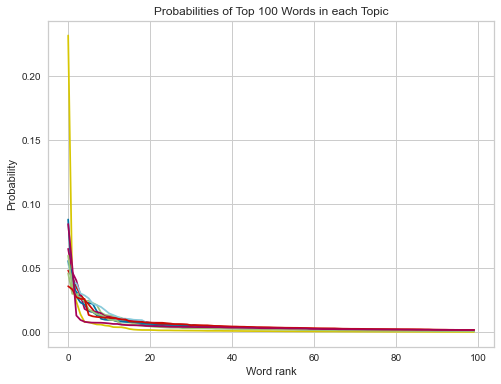

In [90]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

# top 100 words by weight in each topic
top_n_words = 100
topics = lda_model.show_topics(
    num_topics = 10, num_words = top_n_words, formatted = False)

for _, infos in topics:
    probs = [prob for _, prob in infos]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')
plt.show()

- Dans le graphique ci-dessus, chaque ligne correspond à l'un de nos dix sujets. Remarquez comment, pour chaque sujet, les poids chutent brusquement à mesure que nous descendons dans la liste classée des mots les plus importants. Cela montre que les 10 à 20 premiers mots de chaque sujet reçoivent un poids beaucoup plus élevé que les mots restants (rappelez-vous de l'étape de prétraitement que la taille de notre vocabulaire était de 100000)

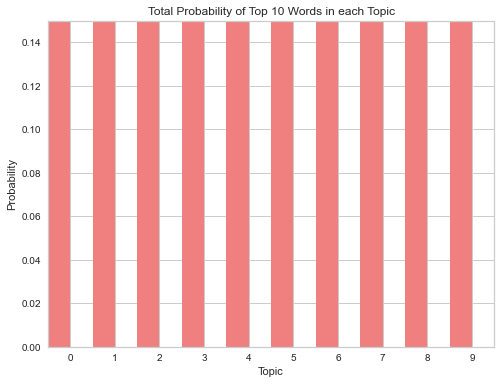

In [91]:
# total weight assigned by each topic to its top 10 words
top_probs = []
top_n_words = 10
topics = lda_model.show_topics(num_words = top_n_words, formatted = False)
for _, infos in topics:
    prob = sum([prob for _, prob in infos])
    top_probs.append(prob)

ind = np.arange(top_n_words)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind - (width / 2), top_probs, width, color = 'lightcoral')
ax.set_xticks(ind)

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
plt.xlim(-0.5, 9.5)
plt.ylim(0, 0.15)
plt.show()

- Nous voyons ici que, pour notre Topic modèle, les 10 premiers mots ne représentent qu'une petite fraction (dans ce cas, entre 10% et 15%) de la masse de probabilité totale de leur thème. Ainsi, bien que nous puissions utiliser les mots principaux pour identifier des thèmes généraux pour chaque sujet, nous devons garder à l'esprit qu'en réalité, ces sujets sont plus complexes qu'un simple résumé de 10 mots.


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Compute Model Perplexity and Coherence Score</h2>
</div>


- Model perplexity and [topic coherence] provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

In [92]:
# compute Perplexity - lower is the better
perplexity= lda_model.log_perplexity(corpus_)
print('\nPerplexity: ', perplexity)

2021-05-16 00:29:09,494 : INFO : -7.664 per-word bound, 202.8 perplexity estimate based on a held-out corpus of 8763 documents with 946031 words



Perplexity:  -7.663966776796932


In [93]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

2021-05-16 00:29:09,537 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2021-05-16 00:29:17,420 : INFO : 5 batches submitted to accumulate stats from 320 documents (-5298 virtual)
2021-05-16 00:29:17,645 : INFO : 7 batches submitted to accumulate stats from 448 documents (-4280 virtual)
2021-05-16 00:29:18,182 : INFO : 10 batches submitted to accumulate stats from 640 documents (-5520 virtual)
2021-05-16 00:29:18,512 : INFO : 12 batches submitted to accumulate stats from 768 documents (-6202 virtual)
2021-05-16 00:29:18,898 : INFO : 16 batches submitted to accumulate stats from 1024 documents (-8467 virtual)
2021-05-16 00:29:19,927 : INFO : 23 batches submitted to accumulate stats from 1472 documents (-14923 virtual)
2021-05-16 00:29:20,321 : INFO : 27 batches submitted to accumulate stats from 1728 documents (-19054 virtual)
2021-05-16 00:29:20,773 : INFO : 31 batches submitted to accumulate stats from 1984 do

Coherence Score:  0.48709671656289066


- Appelons la fonction et répétons-la sur la gamme de valeurs de paramètres de rubriques, alpha et bêta



<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Model visualization</h2>
</div>


- Nous avons commencé par comprendre pourquoi l'évaluation du modèle thématique est essentielle. Ensuite, nous avons passé en revue les méthodes existantes et effleuré la surface de la cohérence des sujets, ainsi que les mesures de cohérence disponibles. Ensuite, nous avons construit un modèle LDA par défaut en utilisant l'implémentation de Gensim pour établir le score de cohérence de base et examiné des moyens pratiques d'optimiser les hyperparamètres LDA.

In [100]:
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models as pgm

lda_vis= pgm.prepare(lda_model, corpus_, id2word)
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.299120 -0.049598       1        1  40.848952
3     -0.297420 -0.018185       2        1  25.432175
8     -0.240637 -0.006639       3        1  12.581162
2     -0.273423 -0.035448       4        1  10.714152
9      0.005308  0.252679       5        1   3.396029
5      0.184135  0.152770       6        1   2.307070
6      0.181200 -0.189723       7        1   1.882048
0      0.229525 -0.012010       8        1   1.475775
7      0.258891 -0.036132       9        1   0.804241
4      0.251540 -0.057714      10        1   0.558397, topic_info=         Term          Freq         Total Category  logprob  loglift
177   android   2715.000000   2715.000000  Default  30.0000  30.0000
86          i  30594.000000  30594.000000  Default  29.0000  29.0000
221        at   3076.000000   3076.000000  Default  28.0000  28.0000
34         to  31388.000000  31388.000000  Default  27.0000  27.0000
336     class   2399.000000   2399.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1302    group     32.574488    173.632823  Topic10  -5.0886   3.5144
813     nodej     26.413860    272.648018  Topic10  -5.2983   2.8536
1894        g      9.503208    195.729032  Topic10  -6.3205   2.1628
221        at      9.626079   3076.356838  Topic10  -6.3077  -0.5792
693     track      7.653991    185.324365  Topic10  -6.5369   2.0010

[651 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
374       1  0.951279  .net
374       2  0.045802  .net
375       1  0.165013     0
375       2  0.258282     0
375       3  0.090877     0
...     ...       ...   ...
40        2  0.215405   you
40        3  0.016130   you
40        4  0.053431   you
1163      3  0.344869     z
1163      7  0.653435     z

[1145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 9, 3, 10, 6, 7, 1, 8, 5])

In [102]:
# Example of our lda gensim model
from IPython.display import Image
#Image(filename="lda_gensim.png")

- Un bon Topic model aura des bulles assez grosses et non superposées dispersées dans le graphique au lieu d'être regroupées dans un quadrant. Dans ce cas, ce n'est pas un assez bon Topic model. 


<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> API: Program of recommendation system Supervised </h2>
</div>

In [199]:
# Jaccard Score of OVR on test set

LR = OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42, C=10.0, penalty='l1'))
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
jaccard = avg_jaccard(y_test, y_pred)
print('Jaccard score in percentage for OVR with LogisticRegression: %.2f' % jaccard)

Jaccard score in percentage for OVR with LogisticRegression: 60.42


In [200]:
# SAUVEGARDE
with open('LR.pkl', 'wb') as f:
    pickle.dump(LR, f)

In [201]:
multilabel_binarizer.classes_

array(['.net', 'android', 'bash', 'c', 'c#', 'c++', 'css', 'git', 'html',
       'ios', 'java', 'javascript', 'jquery', 'mysql', 'node.js',
       'objective-c', 'php', 'python', 'sql', 'string'], dtype=object)

In [202]:

def Recommanded_tags(question):
    question= clean_text(question)
    print(question)
    question= BeautifulSoup(question).get_text()
    print(question)
   
    question= remove_stopwords(question)
    print(question)
    question= remove_contract_form(question)
    print(question)
    question= stemm_text(question)
    print(question)
    question= clean_punct(question)
    print(question)
    Cleaned_question=[question]
    
    TFIDF_question= vectorizerIdf.transform(Cleaned_question)
    y_pred_encod= LR.predict(TFIDF_question)
    
    tags_encod= multilabel_binarizer.inverse_transform(y_pred_encod)
    return tags_encod


question= input('Ask your question: ')
tags_encod= Recommanded_tags(question)
print('Recommended tags are: {}'.format(tags_encod))


Ask your question: Well, i have simple console programm (written in php), which outputs some information and then wait for user input and after input, again outputs some another information.  I need to write nodejs programm that will:  Catch first output from this program Somehow saving this interaction in order to send command to it later. Process and show new text to user and wait for input (inside node) Grab user input and passes it to opened programm Show last output from php programm in node end nodejs To keep it simple lets pretend the program is:  <?php $line = readline("Enter your command: "); print 'Thank you for submitting data.'; ?> My main problem is that i don't know how to handle "holding" php program opened.  What i ended up for now in node is this:  const readline = require('readline'); const exec = require('child_process').exec; const rl = readline.createInterface({   input: process.stdin,   output: process.stdout });  exec('php programm.php', function(error, stdout, s